In [2]:
# #Import all the necessary python libraries
# import os
# import pandas as pd
# import numpy as np

# import json
# import pymzml
# import csv
# import re
# from tqdm import tqdm

# import warnings

# import plotly.graph_objs as go
# from scipy.integrate import trapz
# import matplotlib.pyplot as plt
# from sklearn.mixture import GaussianMixture


# #######################################
# ### FIX AND DOUBLE CHECK LATER#######
# #################################
# #CLAW made directories 
# import create_directory
# import CLAW
# import OzESI_CLAW
# # import OzESI
# # import OzESI_plot
# # import OzESI_compare

# #version 2
# import OzESI
# from OzESI_plot import Plot
# # Import the create_folder function from OzESI_utils
# from OzESI_utils import create_folder, create_base_directory, generate_filename, save_for_ozone_compare, create_project_folder, filter_o3mzml_files, create_all_folders
# from OzESI_compare import OzoneCompare

# # Suppress all warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)



# Set Directories to load and save

In [2]:


# # Define the mode: 'ON' or 'OFF'
# mode = 'ON'  # Change to 'ON' as needed

# # Project Directory
# project = './Projects/'

# # Project Name
# project_name = 'AMP' #name of project
# project_data_name = 'AMP' #name of data from project

# project_folder_data = f'{project}{project_name}/AMP_ON/'
# project_results_folder = f'{project}{project_name}/results/'

# #mzML Data
# mzml_data = f'{project}{project_name}/mzml/AMP_ON/' #mzML Parse

# #CSV Data
# csv_data_folder = f'{project_results_folder}csv_data/'


# grouped_data_csv = f"{csv_data_folder}{project_data_name}_LipidGrouper_{mode}.csv" # Save RawDataParser output CSV file
# matched_data_csv = f"{csv_data_folder}{project_data_name}_MatchedData_{mode}.csv" # Save MatchedData output CSV file
# peak_analysis_csv = f"{csv_data_folder}{project_data_name}_PeakAnalysis_{mode}.csv" # Path to the PeakAnalysis output CSV file


# #plot data
# plots_directory = f'Projects/{project_name}/results/{project_data_name}/plots/on/'

# #Database Locations
# OzON_database = 'lipid_database/OzON_databases/OzON_Possible_Database.csv' ##double check this is right
# OzOFF_database = f'{csv_data_folder}{project_name}_OzOFF_possible.csv'



# # Define all necessary folder paths
# folders_to_create = [
#     csv_data_folder,
#     plots_directory,
#     project_results_folder,
#     plots_directory
# ]

# # Call the function to ensure all folders exist
# create_all_folders(*folders_to_create)



Folder already exists: ./Projects/AMP/results/csv_data/
Folder already exists: Projects/AMP/results/AMP/plots/on/
Folder already exists: ./Projects/AMP/results/
Folder already exists: Projects/AMP/results/AMP/plots/on/


# Imports

In [10]:
import pandas as pd

### MZML PARSER run on backend 
Step 1

In [2]:
# Submit the SLURM job for mzml_parser_1.sh
!sbatch core/backend/mzml_parser_1.sh


Submitted batch job 18318098


In [7]:
# Submit the SLURM job for mzml_parser_1.sh
!sbatch core/backend/mzml_parser_1_test.sh


Submitted batch job 18821746


In [12]:
transition_summed_df = pd.read_parquet('df_transition_summed.parquet')
transition_summed_df.head()

,Parent_Ion,Product_Ion,Intensity,Transition,Sample_ID
0,227.1,183.0,128625.429199,227.1 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01
1,241.1,183.0,94654.506634,241.1 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01
2,255.2,183.0,160096.651577,255.2 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01
3,269.1,183.0,149254.590614,269.1 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01
4,283.2,183.0,479790.393131,283.2 -> 183.0,11162023_Blank-AMP_2x_MRMs_O3on_01


In [14]:
# df_mzml_parser_1 = pd.read_parquet('Projects/AMP/mzml_parsed/df_mzml_parser_1_test.parquet')
# df_mzml_parser_1



,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD_RT_ON
0,None,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,WT_m1_cereb_FAD245,7.990233
1,None,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,WT_m1_cereb_FAD245,7.990233
2,None,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,WT_m1_cereb_FAD245,7.990233
3,None,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,WT_m1_cereb_FAD245,7.990233
4,None,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,WT_m1_cereb_FAD245,7.990233
...,...,...,...,...,...,...,...,...,...
127706,None,533.5,183.0,29.949050,41.680004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,WT_m1_cereb_FAD245,7.990233
127707,None,533.5,183.0,29.961967,41.660004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,WT_m1_cereb_FAD245,7.990233
127708,None,533.5,183.0,29.974883,41.740002,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,WT_m1_cereb_FAD245,7.990233
127709,None,533.5,183.0,29.987800,41.540005,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,WT_m1_cereb_FAD245,7.990233


# Import the 3 DFs A = OzOFF possibile, B = OzON Database, C = OzON Data

In [10]:
import pandas as pd
# OzON_database = pd.read_csv('lipid_database/OzON_databases/OzON_Possible_Database_0.csv')
# OzON_database.to_parquet('lipid_database/OzON_databases/OzON_Possible_Database_0.parquet')


# # Import CSV files
OzOFF_database = pd.read_csv('Projects/AMP/results/csv_data/OzOFF_Possible_species.csv')
OzOFF_database = OzOFF_database.iloc[1000:1005]  # Keep only 5 rows for development
# Save as parquet files with the same names and directories
OzOFF_database.to_parquet('Projects/AMP/results/csv_data/OzOFF_Possible_species_test.parquet')


# Import parquet files
OzOFF_database = pd.read_parquet('Projects/AMP/results/csv_data/OzOFF_Possible_species.parquet')

OzON_database = pd.read_parquet('lipid_database/OzON_databases/OzON_Possible_Database_0.parquet')

# Note: The OzESI_df is not used in this code as per your instructions

In [9]:
# # Assuming OzOFF_database is your DataFrame
# # Display the first few rows of OzOFF_database
# print(OzOFF_database.head())

# # Keep only the first 5 rows
# ################ DO THIS TO MAKE DEVELOP GO MUST FASTER, REMOVE AFTER DEVELOPMENT DONE
# # OzOFF_database = OzOFF_database.iloc[:21]

# # Display the updated DataFrame to verify
# OzOFF_database #A


# adjust ozOFF database

In [8]:
# import pandas as pd

# # Custom sorting key function
# def custom_sort_key(species):
#     try:
#         # Try to convert the species string to a list of integers
#         return list(map(int, species.split(':')))
#     except ValueError:
#         # If conversion fails, push this species to the end
#         return [float('inf')]

# # Process the OzOFF database
# def process_ozoff_database(ozoff_database):
#     """
#     Processes the OzOFF database by removing rows where the Sample column is 'Blank',
#     keeping only unique values of the Species column, and sorting by Species.
    
#     :param ozoff_database: DataFrame containing the OzOFF database.
#     :return: DataFrame with unique Species values.
#     """
#     # Remove rows where the Sample column is 'Blank'
#     ozoff_database = ozoff_database[ozoff_database['Sample'] != 'Blank']
    
#     # Keep only unique values of the Species column
#     ozoff_database_unique_species = ozoff_database.drop_duplicates(subset='Species')
    
#     # Sort by Species using the custom sort key
#     ozoff_database_unique_species = ozoff_database_unique_species.sort_values(by='Species', key=lambda x: x.map(custom_sort_key))
    
#     return ozoff_database_unique_species

# # Example usage in a Jupyter notebook cell
# if __name__ == "__main__":
#     # Assuming OzOFF_database is already loaded as a DataFrame

#     # Process the OzOFF database
#     ozoff_database_unique_species = process_ozoff_database(OzOFF_database)

#     # Display the result
#     display(ozoff_database_unique_species)




In [7]:
# ozoff_database_unique_species.to_parquet('Projects/AMP/off_possible/AMP_OFF_Possible_species.parquet')
# ozoff_database_unique_species.reset_index(drop=True, inplace=True)
# ozoff_database_unique_species

new off

In [45]:
import pandas as pd
new_off = pd.read_parquet('Projects/AMP/results/csv_data/OzOFF_Possible_species_RTalign.parquet')
new_off = pd.read_parquet('Projects/AMP/off_possible/AMP_OzOFF_RT_cereb_WT_m1_FAD245.parquet')
new_off
# new_off['Sample'].unique()  

,Sample_ID,Lipid,Retention_Time,Species,OzESI_Intensity,Sample,STD_RT_OFF
0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,10:0,4.05,10:0,2.974930e+05,cereb_WT_m1_FAD245,8.02
1,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,11:0,4.35,11:0,4.713888e+04,cereb_WT_m1_FAD245,8.02
2,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,12:0,4.81,12:0,2.842467e+05,cereb_WT_m1_FAD245,8.02
3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,13:0,5.50,13:0,3.032080e+04,cereb_WT_m1_FAD245,8.02
4,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,14:0,6.29,14:0,2.772756e+06,cereb_WT_m1_FAD245,8.02
5,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,14:1,5.42,14:1,1.060096e+04,cereb_WT_m1_FAD245,8.02
6,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,15:0,7.22,15:0,4.130792e+05,cereb_WT_m1_FAD245,8.02
7,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,15:1,6.21,15:1,8.872721e+03,cereb_WT_m1_FAD245,8.02
8,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,16:0,8.03,16:0,1.187770e+07,cereb_WT_m1_FAD245,8.02
9,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,16:1,7.09,16:1,1.542285e+05,cereb_WT_m1_FAD245,8.02


In [5]:
OzON_database = pd.read_parquet('lipid_database/OzON_databases/OzON_Possible_Database_0.parquet')
OzON_database #B

,Lipid,Parent_Ion,Product_Ion,Species,Class,DB Location,FA mass,[FA+AMP]+
0,FA(5:0),269.3,183.0,5:0,FA,None,102.2,281.3
1,FA(6:0),283.3,183.0,6:0,FA,None,116.2,295.3
2,FA(6:1)_<>_n-2,269.2,183.0,6:1,FA,<>,114.1,281.2
3,FA(6:1)_<>_n-3,255.2,183.0,6:1,FA,<>,114.1,281.2
4,FA(6:1)_<>_n-4,241.2,183.0,6:1,FA,<>,114.1,281.2
...,...,...,...,...,...,...,...,...
6531,FA(30:6)_<BBFFF>_n-26,265.5,183.0,30:6,FA,<BBFFF>,440.4,607.5
6532,FA(30:6)_<FFFFF>_n-27,255.5,183.0,30:6,FA,<FFFFF>,440.4,607.5
6533,FA(30:6)_<BFFFF>_n-27,253.5,183.0,30:6,FA,<BFFFF>,440.4,607.5
6534,FA(30:6)_<FFFFF>_n-28,241.5,183.0,30:6,FA,<FFFFF>,440.4,607.5


In [2]:
import pandas as pd
df_sample = pd.read_parquet('Projects/AMP/samples/test/df_sample_2_cereb_WT_m1_FAD245.parquet')
df_sample
# df_sample['Sample'].unique()
#df_sample

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD_RT_ON
0,None,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
1,None,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
2,None,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
3,None,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
4,None,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
...,...,...,...,...,...,...,...,...,...
127706,None,533.5,183.0,29.949050,41.680004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233
127707,None,533.5,183.0,29.961967,41.660004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233
127708,None,533.5,183.0,29.974883,41.740002,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233
127709,None,533.5,183.0,29.987800,41.540005,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233


# Add Sample Column to OzESI_df

# Sample run on backend
step 2

In [4]:
# Submit the SLURM job for !sbatch core/backend/sample_2.sh
!sbatch core/backend/sample_2.sh


Submitted batch job 18674930


In [9]:
# Submit the SLURM job for !sbatch core/backend/sample_2.sh
!sbatch core/backend/sample_2_test.sh


Submitted batch job 18821756


In [23]:
import pandas as pd
df = pd.read_parquet('Projects/AMP/samples/test/df_sample_2_cereb_WT_m1_FAD245.parquet')
df

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD_RT_ON
0,None,227.1,183.0,0.011583,41.060001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
1,None,227.1,183.0,0.024483,41.360004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
2,None,227.1,183.0,0.037383,41.320004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
3,None,227.1,183.0,0.050317,41.340004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
4,None,227.1,183.0,0.063233,41.380001,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233
...,...,...,...,...,...,...,...,...,...
127706,None,533.5,183.0,29.949050,41.680004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233
127707,None,533.5,183.0,29.961967,41.660004,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233
127708,None,533.5,183.0,29.974883,41.740002,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233
127709,None,533.5,183.0,29.987800,41.540005,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233


In [6]:
import pandas as pd
df = pd.read_parquet('Projects/AMP/samples/df_sample_2_5xFAD_m1_cereb_FAD231.parquet')
df

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample
0,None,227.1,183.0,0.011583,41.400002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,5xFAD_m1_cereb_FAD231
1,None,227.1,183.0,0.024483,41.720001,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,5xFAD_m1_cereb_FAD231
2,None,227.1,183.0,0.037383,52.160004,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,5xFAD_m1_cereb_FAD231
3,None,227.1,183.0,0.050317,55.380005,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,5xFAD_m1_cereb_FAD231
4,None,227.1,183.0,0.063233,56.700005,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,227.1 -> 183.0,5xFAD_m1_cereb_FAD231
...,...,...,...,...,...,...,...,...
127706,None,533.5,183.0,29.949050,41.600002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,5xFAD_m1_cereb_FAD231
127707,None,533.5,183.0,29.961967,41.640003,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,5xFAD_m1_cereb_FAD231
127708,None,533.5,183.0,29.974883,41.740002,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,5xFAD_m1_cereb_FAD231
127709,None,533.5,183.0,29.987800,41.720001,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,533.5 -> 183.0,5xFAD_m1_cereb_FAD231


# MATCH LIPIDS

#

In [14]:
# Submit the SLURM job for !sbatch core/backend/match_3.sh
!sbatch core/backend/match_3.sh


Submitted batch job 18472349


In [10]:
# Submit the SLURM job for !sbatch core/backend/match_3.sh
!sbatch core/backend/match_3_test.sh


Submitted batch job 18821819


In [11]:
import pandas as pd
df = pd.read_parquet('Projects/AMP/match/test/df_match_3_cereb_WT_m1_FAD245.parquet')
df
# print unique species
# df['Lipid'].unique()

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD_RT_ON,STD_RT_Dif,Species,Class,STD_RT_OFF
0,,227.1,183.0,3.590483,104.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,10:0,,8.02
1,,227.1,183.0,3.603417,101.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,10:0,,8.02
2,,227.1,183.0,3.616333,89.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,10:0,,8.02
3,,227.1,183.0,3.629250,51.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,10:0,,8.02
4,,227.1,183.0,3.642167,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,227.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,10:0,,8.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110700,,533.5,183.0,8.488333,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,d2-16:0,,8.02
110701,,533.5,183.0,8.501250,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,d2-16:0,,8.02
110702,,533.5,183.0,8.514183,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,d2-16:0,,8.02
110703,,533.5,183.0,8.527100,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,533.5 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,d2-16:0,,8.02


In [6]:
# !sbatch core/backend/match_chunk_3.sh


Submitted batch job 18333188


# df Chunks -> df Full
Import all df chunks and then concat into 1 df and export as parquet file 

In [1]:
# !sbatch core/backend/match_combine_3.sh


Submitted batch job 18418004


In [1]:
import pandas as pd
df = pd.read_parquet('df_match_3_chunk_0_100.parquet')
#print unqiue Species


In [5]:
df['Sample'].unique()
df['Species'].unique()
df['Lipid'].unique()
#df

array(['',
       'FA(8:1)_<>_n-6 | FA(9:1)_<>_n-7 | FA(10:1)_<>_n-8 | FA(12:1)_<>_n-10 | FA(13:1)_<>_n-11 | FA(14:1)_<>_n-12 | FA(15:1)_<>_n-13 | FA(15:2)_<F>_n-13 | FA(15:3)_<FF>_n-13 | FA(16:1)_<>_n-14 | FA(16:2)_<F>_n-14 | FA(17:1)_<>_n-15 | FA(18:1)_<>_n-16 | FA(18:2)_<F>_n-16 | FA(18:3)_<FF>_n-16 | FA(18:4)_<FFF>_n-16 | FA(20:1)_<>_n-18 | FA(20:2)_<F>_n-18 | FA(20:3)_<FF>_n-18 | FA(20:4)_<FFF>_n-18 | FA(20:5)_<FFFF>_n-18',
       'FA(8:1)_<>_n-5 | FA(9:1)_<>_n-6 | FA(10:1)_<>_n-7 | FA(12:1)_<>_n-9 | FA(13:1)_<>_n-10 | FA(14:1)_<>_n-11 | FA(15:1)_<>_n-12 | FA(15:2)_<F>_n-12 | FA(15:3)_<FF>_n-12 | FA(16:1)_<>_n-13 | FA(16:2)_<F>_n-13 | FA(17:1)_<>_n-14 | FA(18:1)_<>_n-15 | FA(18:2)_<F>_n-15 | FA(18:3)_<FF>_n-15 | FA(18:4)_<FFF>_n-15 | FA(20:1)_<>_n-17 | FA(20:2)_<F>_n-17 | FA(20:3)_<FF>_n-17 | FA(20:4)_<FFF>_n-17 | FA(20:5)_<FFFF>_n-17 | FA(22:1)_<>_n-19 | FA(22:6)_<FFFFF>_n-19',
       'FA(5:0) | FA(8:1)_<>_n-4 | FA(9:1)_<>_n-5 | FA(10:1)_<>_n-6 | FA(12:1)_<>_n-8 | FA(13:1)_<>_n-9

# LipidGrouper group lipids by ion m/z and samples
step 4

In [3]:
!sbatch core/backend/group_4.sh

Submitted batch job 18547588


In [12]:
!sbatch core/backend/group_4_test.sh

Submitted batch job 18821829


In [18]:
# read in group_4.parquet data
group_4 = pd.read_parquet('df_group_4.parquet')
#print unique columns
print(group_4.columns.unique())
group_4

Index(['Lipid', 'Parent_Ion', 'Product_Ion', 'Retention_Time',
       'OzESI_Intensity', 'Sample_ID', 'Transition', 'Sample', 'Species',
       'Class', 'Possible_Lipids', 'Biology', 'Genotype', 'Cage', 'Mouse',
       'group_by_ion', 'group_by_lipid'],
      dtype='object')


,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,Species,Class,Possible_Lipids,Biology,Genotype,Cage,Mouse,group_by_ion,group_by_lipid
0,FA(18:1)_<>_n-10,325.2,183.0,8.162467,84.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
1,FA(18:1)_<>_n-10,325.2,183.0,8.175400,91.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
2,FA(18:1)_<>_n-10,325.2,183.0,8.188317,89.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
3,FA(18:1)_<>_n-10,325.2,183.0,8.201233,81.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
4,FA(18:1)_<>_n-10,325.2,183.0,8.214150,53.0,11162023_Blank-AMP_2x_MRMs_O3on_01,325.2 -> 183.0,Blank,18:1,FA,FA(18:1)_<>_n-10 | FA(18:2)_<F>_n-10 | FA(18:3...,,,,,336,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217849,FA(18:3)_<FF>_n-9,339.3,183.0,4.570200,310.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217850,FA(18:3)_<FF>_n-9,339.3,183.0,4.583133,244.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217851,FA(18:3)_<FF>_n-9,339.3,183.0,4.596050,174.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746
217852,FA(18:3)_<FF>_n-9,339.3,183.0,4.608967,137.0,11162023_WT-m5-hippo-FAD263_AMP_2x_0.05uMd216-...,339.3 -> 183.0,WT_m5_hippo_FAD263,18:3,FA,FA(18:1)_<>_n-9 | FA(18:2)_<F>_n-9 | FA(18:3)_...,hippo,WT,FAD263,m5,445,2746


group test

In [13]:
import pandas as pd
df_group = pd.read_parquet('Projects/AMP/group/test/df_group_4_cereb_WT_m1_FAD245.parquet')
df_group

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Sample,STD_RT_ON,STD_RT_Dif,Species,Class,STD_RT_OFF,Possible_Lipids,Biology,Genotype,Cage,Mouse,group_by_ion,group_by_lipid
0,FA(14:1)_<>_n-10,269.1,183.0,4.959450,57.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,269.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,14:1,FA,8.02,FA(5:0) | FA(14:1)_<>_n-10 | FA(15:1)_<>_n-11 ...,cereb,WT,FAD245,m1,2,0
1,FA(14:1)_<>_n-10,269.1,183.0,4.972367,61.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,269.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,14:1,FA,8.02,FA(5:0) | FA(14:1)_<>_n-10 | FA(15:1)_<>_n-11 ...,cereb,WT,FAD245,m1,2,0
2,FA(14:1)_<>_n-10,269.1,183.0,4.985300,60.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,269.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,14:1,FA,8.02,FA(5:0) | FA(14:1)_<>_n-10 | FA(15:1)_<>_n-11 ...,cereb,WT,FAD245,m1,2,0
3,FA(14:1)_<>_n-10,269.1,183.0,4.998217,58.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,269.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,14:1,FA,8.02,FA(5:0) | FA(14:1)_<>_n-10 | FA(15:1)_<>_n-11 ...,cereb,WT,FAD245,m1,2,0
4,FA(14:1)_<>_n-10,269.1,183.0,5.011133,54.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,269.1 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,14:1,FA,8.02,FA(5:0) | FA(14:1)_<>_n-10 | FA(15:1)_<>_n-11 ...,cereb,WT,FAD245,m1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14612,FA(22:6)_<FFFFF>_n-9,395.3,183.0,1.118250,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,22:6,FA,8.02,FA(14:0) | FA(15:1)_<>_n-2 | FA(16:1)_<>_n-3 |...,cereb,WT,FAD245,m1,21,188
14613,FA(22:6)_<FFFFF>_n-9,395.3,183.0,1.131167,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,22:6,FA,8.02,FA(14:0) | FA(15:1)_<>_n-2 | FA(16:1)_<>_n-3 |...,cereb,WT,FAD245,m1,21,188
14614,FA(22:6)_<FFFFF>_n-9,395.3,183.0,1.144083,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,22:6,FA,8.02,FA(14:0) | FA(15:1)_<>_n-2 | FA(16:1)_<>_n-3 |...,cereb,WT,FAD245,m1,21,188
14615,FA(22:6)_<FFFFF>_n-9,395.3,183.0,1.157000,41.0,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,7.990233,0.029767,22:6,FA,8.02,FA(14:0) | FA(15:1)_<>_n-2 | FA(16:1)_<>_n-3 |...,cereb,WT,FAD245,m1,21,188


# after updated grouping ti should be sorted by RT

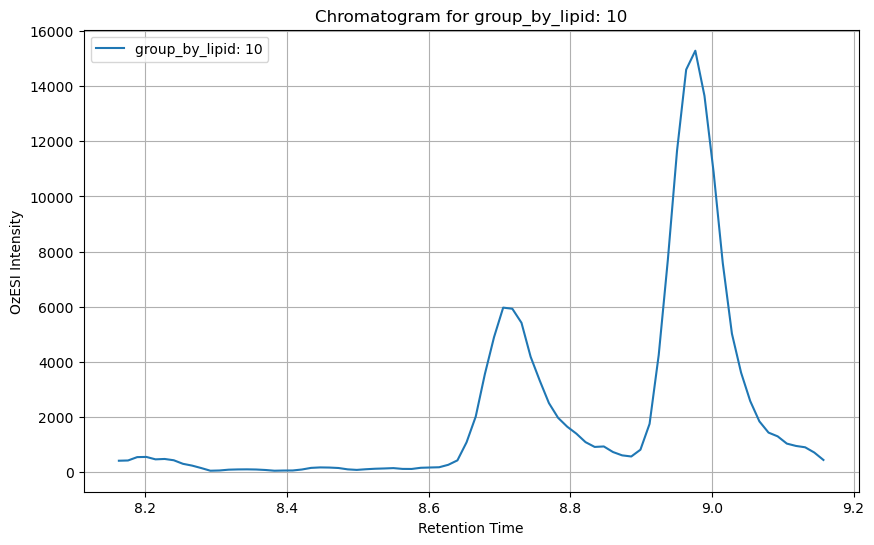

In [20]:
import matplotlib.pyplot as plt

# Function to plot the chromatogram for a specific group_by_lipid value
def plot_chromatogram(df, group_value):
    group_data = df[df['group_by_lipid'] == group_value]
    
    # Ensure the Retention_Time is sorted
    group_data = group_data.sort_values(by='Retention_Time')
    
    plt.figure(figsize=(10, 6))
    plt.plot(group_data['Retention_Time'], group_data['OzESI_Intensity'], label=f'group_by_lipid: {group_value}')
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Chromatogram for group_by_lipid: {group_value}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the specific group_by_lipid value you are interested in
specific_group_by_lipid_value = 10  # Replace with the actual value you are interested in

# Call the function to plot the chromatogram
plot_chromatogram(group_4, specific_group_by_lipid_value)


In [2]:
import pandas as pd
# ddd = pd.read_parquet('df_match_3_chunk_0_100.parquet')
# ddd

df = pd.read_parquet('Projects/AMP/analysis')
df

,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,Filter_Column,n_value
0,FA(18:1)_<>_n-2,8.480583,2077.0,28,7,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,437.4 -> 183.0,5xFAD_m1_cereb_FAD231,437.4,183.0,...,cereb,5xFAD,FAD231,m1,2077.0,0.065651,0.064600,134.174200,group_by_lipid,2
1,FA(18:1)_<>_n-2,8.816517,115149.0,28,7,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,437.4 -> 183.0,5xFAD_m1_cereb_FAD231,437.4,183.0,...,cereb,5xFAD,FAD231,m1,115149.0,0.120640,0.116283,13389.909550,group_by_lipid,2
2,FA(18:1)_<>_n-2,9.113683,132645.0,28,7,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,437.4 -> 183.0,5xFAD_m1_cereb_FAD231,437.4,183.0,...,cereb,5xFAD,FAD231,m1,132645.0,0.044202,0.038767,5142.204500,group_by_lipid,2
3,FA(18:1)_<>_n-3,9.036983,8301.0,26,8,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,423.3 -> 183.0,5xFAD_m1_cereb_FAD231,423.3,183.0,...,cereb,5xFAD,FAD231,m1,8301.0,0.029504,0.038767,321.802100,group_by_lipid,3
4,FA(18:1)_<>_n-5,8.896300,1140.0,20,10,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,395.3 -> 183.0,5xFAD_m1_cereb_FAD231,395.3,183.0,...,cereb,5xFAD,FAD231,m1,1140.0,0.084690,0.077517,88.369000,group_by_lipid,5
5,FA(18:1)_<>_n-6,8.896900,1072.0,18,11,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,381.3 -> 183.0,5xFAD_m1_cereb_FAD231,381.3,183.0,...,cereb,5xFAD,FAD231,m1,1072.0,0.069503,0.077517,83.097867,group_by_lipid,6
6,FA(18:1)_<>_n-7,8.626200,1954.0,15,12,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,367.3 -> 183.0,5xFAD_m1_cereb_FAD231,367.3,183.0,...,cereb,5xFAD,FAD231,m1,1954.0,0.089260,0.090433,176.706733,group_by_lipid,7
7,FA(18:1)_<>_n-7,8.910433,2038.0,15,12,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,367.3 -> 183.0,5xFAD_m1_cereb_FAD231,367.3,183.0,...,cereb,5xFAD,FAD231,m1,2038.0,0.087168,0.077517,157.978967,group_by_lipid,7
8,FA(18:1)_<>_n-8,8.936883,4792.0,12,13,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,353.3 -> 183.0,5xFAD_m1_cereb_FAD231,353.3,183.0,...,cereb,5xFAD,FAD231,m1,4792.0,0.104463,0.103367,495.333067,group_by_lipid,8
9,FA(18:1)_<>_n-8,9.117783,1263.0,12,13,11192023_5xFAD-m1-cereb-FAD231_AMP_2x_0.05uMd2...,353.3 -> 183.0,5xFAD_m1_cereb_FAD231,353.3,183.0,...,cereb,5xFAD,FAD231,m1,1263.0,0.041405,0.038767,48.962300,group_by_lipid,8


# Analysis Step 5
## Find peaks in Lipid chromatogram data

In [4]:
!sbatch core/backend/analysis_5.sh

Submitted batch job 18547623


In [14]:
!sbatch core/backend/analysis_5_test.sh

Submitted batch job 18821836


In [15]:
test_analysis = pd.read_parquet('Projects/AMP/analysis/test/df_analysis_5_cereb_WT_m1_FAD245.parquet')
# test_group = pd.read_parquet('Projects/AMP/group/df_group_4_5xFAD_m1_cereb_FAD231.parquet')
#print unique columns 
print(test_analysis.columns.unique())
test_analysis
#test_group

Index(['Lipid', 'Retention_Time', 'OzESI_Intensity', 'group_by_ion',
       'group_by_lipid', 'Sample_ID', 'Transition', 'Sample', 'Parent_Ion',
       'Product_Ion', 'Species', 'Class', 'Possible_Lipids', 'Biology',
       'Genotype', 'Cage', 'Mouse', 'Peak_Height', 'FWHM', 'Peak_Width',
       'Peak_Area', 'Filter_Column', 'n_value'],
      dtype='object')


,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,Filter_Column,n_value
0,FA(14:1)_<>_n-2,5.266283,14631.0,18,3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,cereb,WT,FAD245,m1,14631.0,0.173554,0.180883,2646.504050,group_by_lipid,2
1,FA(14:1)_<>_n-2,5.485933,17060.0,18,3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,cereb,WT,FAD245,m1,17060.0,0.085554,0.090450,1543.077000,group_by_lipid,2
2,FA(15:1)_<>_n-2,5.847100,2036.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,cereb,WT,FAD245,m1,2036.0,0.123041,0.129217,263.085133,group_by_lipid,2
3,FA(15:1)_<>_n-2,6.144267,14512.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,cereb,WT,FAD245,m1,14512.0,0.047732,0.051683,750.028533,group_by_lipid,2
4,FA(15:1)_<>_n-2,6.273467,1583222.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,cereb,WT,FAD245,m1,1583222.0,0.088124,0.090450,143202.429900,group_by_lipid,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,FA(20:5)_<FFFF>_n-8,5.485933,17060.0,18,149,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,cereb,WT,FAD245,m1,17060.0,0.071507,0.077533,1322.718667,group_by_lipid,8
71,FA(22:6)_<BBFFF>_n-8,0.730233,2224.0,23,164,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,405.2 -> 183.0,cereb_WT_m1_FAD245,405.2,183.0,...,cereb,WT,FAD245,m1,2224.0,0.058285,0.064600,143.670400,group_by_lipid,8
72,FA(22:6)_<BBBFF>_n-8,0.665833,1923.0,22,157,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,403.2 -> 183.0,cereb_WT_m1_FAD245,403.2,183.0,...,cereb,WT,FAD245,m1,1923.0,0.065629,0.064600,124.225800,group_by_lipid,8
73,FA(22:6)_<FFFFF>_n-17,0.643850,5675.0,3,182,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,283.2 -> 183.0,cereb_WT_m1_FAD245,283.2,183.0,...,cereb,WT,FAD245,m1,5675.0,0.061000,0.051667,293.208333,group_by_lipid,17


analysis test

In [16]:
df_analysis = pd.read_parquet('Projects/AMP/analysis/test/df_analysis_5_cereb_WT_m1_FAD245.parquet')
df_analysis

,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,Filter_Column,n_value
0,FA(14:1)_<>_n-2,5.266283,14631.0,18,3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,cereb,WT,FAD245,m1,14631.0,0.173554,0.180883,2646.504050,group_by_lipid,2
1,FA(14:1)_<>_n-2,5.485933,17060.0,18,3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,cereb,WT,FAD245,m1,17060.0,0.085554,0.090450,1543.077000,group_by_lipid,2
2,FA(15:1)_<>_n-2,5.847100,2036.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,cereb,WT,FAD245,m1,2036.0,0.123041,0.129217,263.085133,group_by_lipid,2
3,FA(15:1)_<>_n-2,6.144267,14512.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,cereb,WT,FAD245,m1,14512.0,0.047732,0.051683,750.028533,group_by_lipid,2
4,FA(15:1)_<>_n-2,6.273467,1583222.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,cereb,WT,FAD245,m1,1583222.0,0.088124,0.090450,143202.429900,group_by_lipid,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,FA(20:5)_<FFFF>_n-8,5.485933,17060.0,18,149,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,cereb,WT,FAD245,m1,17060.0,0.071507,0.077533,1322.718667,group_by_lipid,8
71,FA(22:6)_<BBFFF>_n-8,0.730233,2224.0,23,164,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,405.2 -> 183.0,cereb_WT_m1_FAD245,405.2,183.0,...,cereb,WT,FAD245,m1,2224.0,0.058285,0.064600,143.670400,group_by_lipid,8
72,FA(22:6)_<BBBFF>_n-8,0.665833,1923.0,22,157,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,403.2 -> 183.0,cereb_WT_m1_FAD245,403.2,183.0,...,cereb,WT,FAD245,m1,1923.0,0.065629,0.064600,124.225800,group_by_lipid,8
73,FA(22:6)_<FFFFF>_n-17,0.643850,5675.0,3,182,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,283.2 -> 183.0,cereb_WT_m1_FAD245,283.2,183.0,...,cereb,WT,FAD245,m1,5675.0,0.061000,0.051667,293.208333,group_by_lipid,17


In [32]:
# test_5 = pd.read_parquet('df_analysis_5.parquet')
# #print unique columns
# print(test_5.columns.unique())
# test_5

# Analysis PLOT update

In [4]:
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks, peak_widths

# class Plot:
#     def __init__(self, raw_data_file, analyzed_data_file):
#         self.raw_data = pd.read_parquet(raw_data_file)
#         self.analyzed_data = pd.read_parquet(analyzed_data_file)

#     def plot_peaks(self, project_results=None, file_name_to_save=None):
#         unique_lipids = self.analyzed_data['Lipid'].unique()

#         for lipid in unique_lipids:
#             lipid_data = self.analyzed_data[self.analyzed_data['Lipid'] == lipid]
#             plt.figure(figsize=(10, 6))

#             plt.plot(lipid_data['Retention_Time'], lipid_data['OzESI_Intensity'], label='Intensity')
#             plt.scatter(lipid_data['Retention_Time'], lipid_data['OzESI_Intensity'], color='red')

#             for _, row in lipid_data.iterrows():
#                 plt.annotate(f"Peak Height: {row['Peak_Height']:.2f}\nFWHM: {row['FWHM']:.2f}\nArea: {row['Peak_Area']:.2f}",
#                              (row['Retention_Time'], row['OzESI_Intensity']),
#                              textcoords="offset points",
#                              xytext=(0, 10),
#                              ha='center')

#             plt.title(f"Peaks for Lipid: {lipid}")
#             plt.xlabel('Retention Time')
#             plt.ylabel('OzESI Intensity')
#             plt.legend()
#             plt.grid(True)

#             if project_results and file_name_to_save:
#                 plot_folder = f'{project_results}plots/'
#                 os.makedirs(plot_folder, exist_ok=True)
#                 sample_name = lipid_data['Sample'].iloc[0]
#                 plt.savefig(f"{plot_folder}{file_name_to_save}_{sample_name}_{lipid}_peaks.png")
#             plt.show()
#             plt.close()

#     def plot_data_and_peaks(self, group_type, group_value, height=1000, width=None, rel_height=0.5):
#         if group_type not in ['group_by_ion', 'group_by_lipid']:
#             raise ValueError(f"group_type must be 'group_by_ion' or 'group_by_lipid'")

#         if group_type not in self.raw_data.columns:
#             raise ValueError(f"group_type '{group_type}' is not a valid column in the data")

#         group_data = self.raw_data[self.raw_data[group_type] == group_value]
#         peaks, properties = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
#         results_half = peak_widths(group_data['OzESI_Intensity'], peaks, rel_height=rel_height)

#         plt.figure(figsize=(10, 6))
#         plt.plot(group_data['Retention_Time'], group_data['OzESI_Intensity'], label='Intensity')
#         plt.scatter(group_data['Retention_Time'].iloc[peaks], group_data['OzESI_Intensity'].iloc[peaks], color='red')

#         for i, peak in enumerate(peaks):
#             left_ip = results_half[2][i]
#             right_ip = results_half[3][i]
#             left_time = group_data['Retention_Time'].iloc[int(left_ip)]
#             right_time = group_data['Retention_Time'].iloc[int(right_ip)]
#             width_in_time = right_time - left_time

#             fwhm = results_half[0][i] * (group_data['Retention_Time'].values[1] - group_data['Retention_Time'].values[0])

#             plt.annotate(
#                 f"Peak Height: {properties['peak_heights'][i]:.2f}\nFWHM: {fwhm:.2f}\nArea: {properties['peak_heights'][i] * width_in_time:.2f}",
#                 (group_data['Retention_Time'].iloc[peak], group_data['OzESI_Intensity'].iloc[peak]),
#                 textcoords="offset points",
#                 xytext=(0, 10),
#                 ha='center'
#             )

#         if group_type == 'group_by_lipid':
#             lipid_value = group_data['Lipid'].iloc[0] if 'Lipid' in group_data.columns else 'Unknown'
#             sample_name = group_data['Sample'].iloc[0] if 'Sample' in group_data.columns else 'Unknown'
#             plot_title = f"Lipid: {lipid_value} (Sample: {sample_name})"
#         else:  # group_type == 'group_by_ion'
#             parent_ion_value = group_data['Parent_Ion'].iloc[0] if 'Parent_Ion' in group_data.columns else 'Unknown'
#             plot_title = f"Parent Ion: {parent_ion_value}"

#         plt.title(f"Peaks for {plot_title}")
#         plt.xlabel('Retention Time')
#         plt.ylabel('OzESI Intensity')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

# # Example usage:
# # plotter = Plot("df_group_4.parquet", "df_analysis_5.parquet")
# # plotter.plot_peaks(project_results="./results/", file_name_to_save="lipid_analysis")
# # plotter.plot_data_and_peaks(group_type='group_by_lipid', group_value='some_group_value', height=1000, width=1, rel_height=0.5)


In [6]:
import pandas as pd
test_plot = pd.read_parquet('Projects/AMP/analysis/test/df_analysis_5_cereb_WT_m1_FAD245.parquet')
filtered_data = test_plot.query("Species == '18:1' and n_value == 9")
filtered_data = test_plot.query("Species == '17:1'")
filtered_data
#print unique species test_plot
# print(test_plot['Species'].unique())

# test_plot

,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,Filter_Column,n_value
15,FA(17:1)_<>_n-2,7.615750,1982.0,28,42,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,423.3 -> 183.0,cereb_WT_m1_FAD245,423.3,183.0,...,cereb,WT,FAD245,m1,1982.0,0.034501,0.025833,5.120167e+01,group_by_lipid,2
16,FA(17:1)_<>_n-2,8.003367,9812497.0,28,42,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,423.3 -> 183.0,cereb_WT_m1_FAD245,423.3,183.0,...,cereb,WT,FAD245,m1,9812497.0,0.147692,0.142117,1.394519e+06,group_by_lipid,2
17,FA(17:1)_<>_n-3,7.642200,1678.0,25,43,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,409.3 -> 183.0,cereb_WT_m1_FAD245,409.3,183.0,...,cereb,WT,FAD245,m1,1678.0,0.036112,0.038767,6.505047e+01,group_by_lipid,3
18,FA(17:1)_<>_n-8,7.580667,1245.0,10,48,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,339.3 -> 183.0,cereb_WT_m1_FAD245,339.3,183.0,...,cereb,WT,FAD245,m1,1245.0,0.033779,0.038767,4.826450e+01,group_by_lipid,8


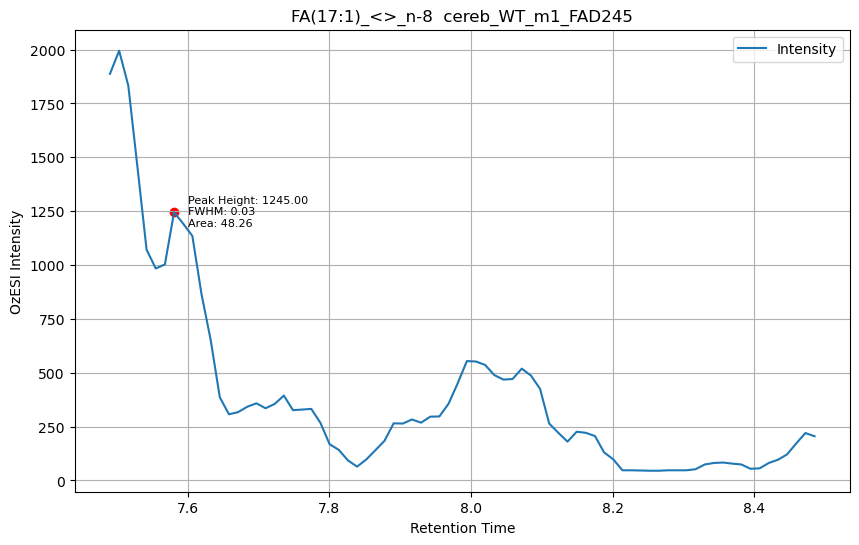

In [72]:
from core.python.plot_analysis_6 import Plot
# Initialize the Plot class with the raw data and analyzed peaks files
plotter = Plot("Projects/AMP/group/test/df_group_4_cereb_WT_m1_FAD245.parquet", "Projects/AMP/analysis/test/df_analysis_5_cereb_WT_m1_FAD245.parquet")

# # Plot peaks for each lipid
# plotter.plot_peaks(project_results="./results/", file_name_to_save="lipid_analysis")

# Plot data and peaks for a specific group
group_type = 'group_by_lipid'  # or 'group_by_ion'
group_value = 48  # Replace with the actual group value you want to plot
plotter.plot_data_and_peaks(group_type, group_value, height=1000, width=1, rel_height=0.5)


add n value pos column

In [23]:
import pandas as pd
import re

def add_n_value_pos_column(df):
    # Define a function to extract the value inside <> including the brackets
    def extract_n_value_pos(lipid):
        match = re.search(r'<.*?>', lipid)
        return match.group(0) if match else ''
    
    # Apply the function to the 'Lipid' column and create the new column 'n_value_pos'
    df['n_value_pos'] = df['Lipid'].apply(extract_n_value_pos)
    
    return df

df_test = add_n_value_pos_column(test_plot)
#print unique values of n_value_pos
print(df_test['n_value_pos'].unique())
df_test

['<>' '<F>' '<B>' '<FF>' '<BF>' '<BBBB>' '<FFFF>' '<BFFF>' '<BBFFF>'
 '<BBBFF>' '<FFFFF>']


,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,Filter_Column,n_value,n_value_pos
0,FA(14:1)_<>_n-2,5.266283,14631.0,18,3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,WT,FAD245,m1,14631.0,0.173554,0.180883,2646.504050,group_by_lipid,2,<>
1,FA(14:1)_<>_n-2,5.485933,17060.0,18,3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,WT,FAD245,m1,17060.0,0.085554,0.090450,1543.077000,group_by_lipid,2,<>
2,FA(15:1)_<>_n-2,5.847100,2036.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,WT,FAD245,m1,2036.0,0.123041,0.129217,263.085133,group_by_lipid,2,<>
3,FA(15:1)_<>_n-2,6.144267,14512.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,WT,FAD245,m1,14512.0,0.047732,0.051683,750.028533,group_by_lipid,2,<>
4,FA(15:1)_<>_n-2,6.273467,1583222.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,WT,FAD245,m1,1583222.0,0.088124,0.090450,143202.429900,group_by_lipid,2,<>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,FA(20:5)_<FFFF>_n-8,5.485933,17060.0,18,149,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,WT,FAD245,m1,17060.0,0.071507,0.077533,1322.718667,group_by_lipid,8,<FFFF>
71,FA(22:6)_<BBFFF>_n-8,0.730233,2224.0,23,164,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,405.2 -> 183.0,cereb_WT_m1_FAD245,405.2,183.0,...,WT,FAD245,m1,2224.0,0.058285,0.064600,143.670400,group_by_lipid,8,<BBFFF>
72,FA(22:6)_<BBBFF>_n-8,0.665833,1923.0,22,157,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,403.2 -> 183.0,cereb_WT_m1_FAD245,403.2,183.0,...,WT,FAD245,m1,1923.0,0.065629,0.064600,124.225800,group_by_lipid,8,<BBBFF>
73,FA(22:6)_<FFFFF>_n-17,0.643850,5675.0,3,182,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,283.2 -> 183.0,cereb_WT_m1_FAD245,283.2,183.0,...,WT,FAD245,m1,5675.0,0.061000,0.051667,293.208333,group_by_lipid,17,<FFFFF>


In [24]:
df_test
# unique_lipids_count = test_plot['Lipid'].nunique()
# unique_lipids_count


,Lipid,Retention_Time,OzESI_Intensity,group_by_ion,group_by_lipid,Sample_ID,Transition,Sample,Parent_Ion,Product_Ion,...,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,Filter_Column,n_value,n_value_pos
0,FA(14:1)_<>_n-2,5.266283,14631.0,18,3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,WT,FAD245,m1,14631.0,0.173554,0.180883,2646.504050,group_by_lipid,2,<>
1,FA(14:1)_<>_n-2,5.485933,17060.0,18,3,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,WT,FAD245,m1,17060.0,0.085554,0.090450,1543.077000,group_by_lipid,2,<>
2,FA(15:1)_<>_n-2,5.847100,2036.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,WT,FAD245,m1,2036.0,0.123041,0.129217,263.085133,group_by_lipid,2,<>
3,FA(15:1)_<>_n-2,6.144267,14512.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,WT,FAD245,m1,14512.0,0.047732,0.051683,750.028533,group_by_lipid,2,<>
4,FA(15:1)_<>_n-2,6.273467,1583222.0,21,15,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,395.3 -> 183.0,cereb_WT_m1_FAD245,395.3,183.0,...,WT,FAD245,m1,1583222.0,0.088124,0.090450,143202.429900,group_by_lipid,2,<>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,FA(20:5)_<FFFF>_n-8,5.485933,17060.0,18,149,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,381.3 -> 183.0,cereb_WT_m1_FAD245,381.3,183.0,...,WT,FAD245,m1,17060.0,0.071507,0.077533,1322.718667,group_by_lipid,8,<FFFF>
71,FA(22:6)_<BBFFF>_n-8,0.730233,2224.0,23,164,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,405.2 -> 183.0,cereb_WT_m1_FAD245,405.2,183.0,...,WT,FAD245,m1,2224.0,0.058285,0.064600,143.670400,group_by_lipid,8,<BBFFF>
72,FA(22:6)_<BBBFF>_n-8,0.665833,1923.0,22,157,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,403.2 -> 183.0,cereb_WT_m1_FAD245,403.2,183.0,...,WT,FAD245,m1,1923.0,0.065629,0.064600,124.225800,group_by_lipid,8,<BBBFF>
73,FA(22:6)_<FFFFF>_n-17,0.643850,5675.0,3,182,11162023_WT-m1-cereb-FAD245_AMP_2x_0.05uMd216-...,283.2 -> 183.0,cereb_WT_m1_FAD245,283.2,183.0,...,WT,FAD245,m1,5675.0,0.061000,0.051667,293.208333,group_by_lipid,17,<FFFFF>


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# unique_retention_times_count = df_test['Retention_Time'].nunique()
# print(f"Count of Unique Retention Times: {unique_retention_times_count}")

# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=df_test, x='Retention_Time', y='OzESI_Intensity', hue='Lipid', palette='viridis')
# plt.title('Retention Time vs. OzESI Intensity')
# plt.xlabel('Retention Time')
# plt.ylabel('OzESI Intensity')
# plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
# plt.show()


Count of Unique Retention Times: 61


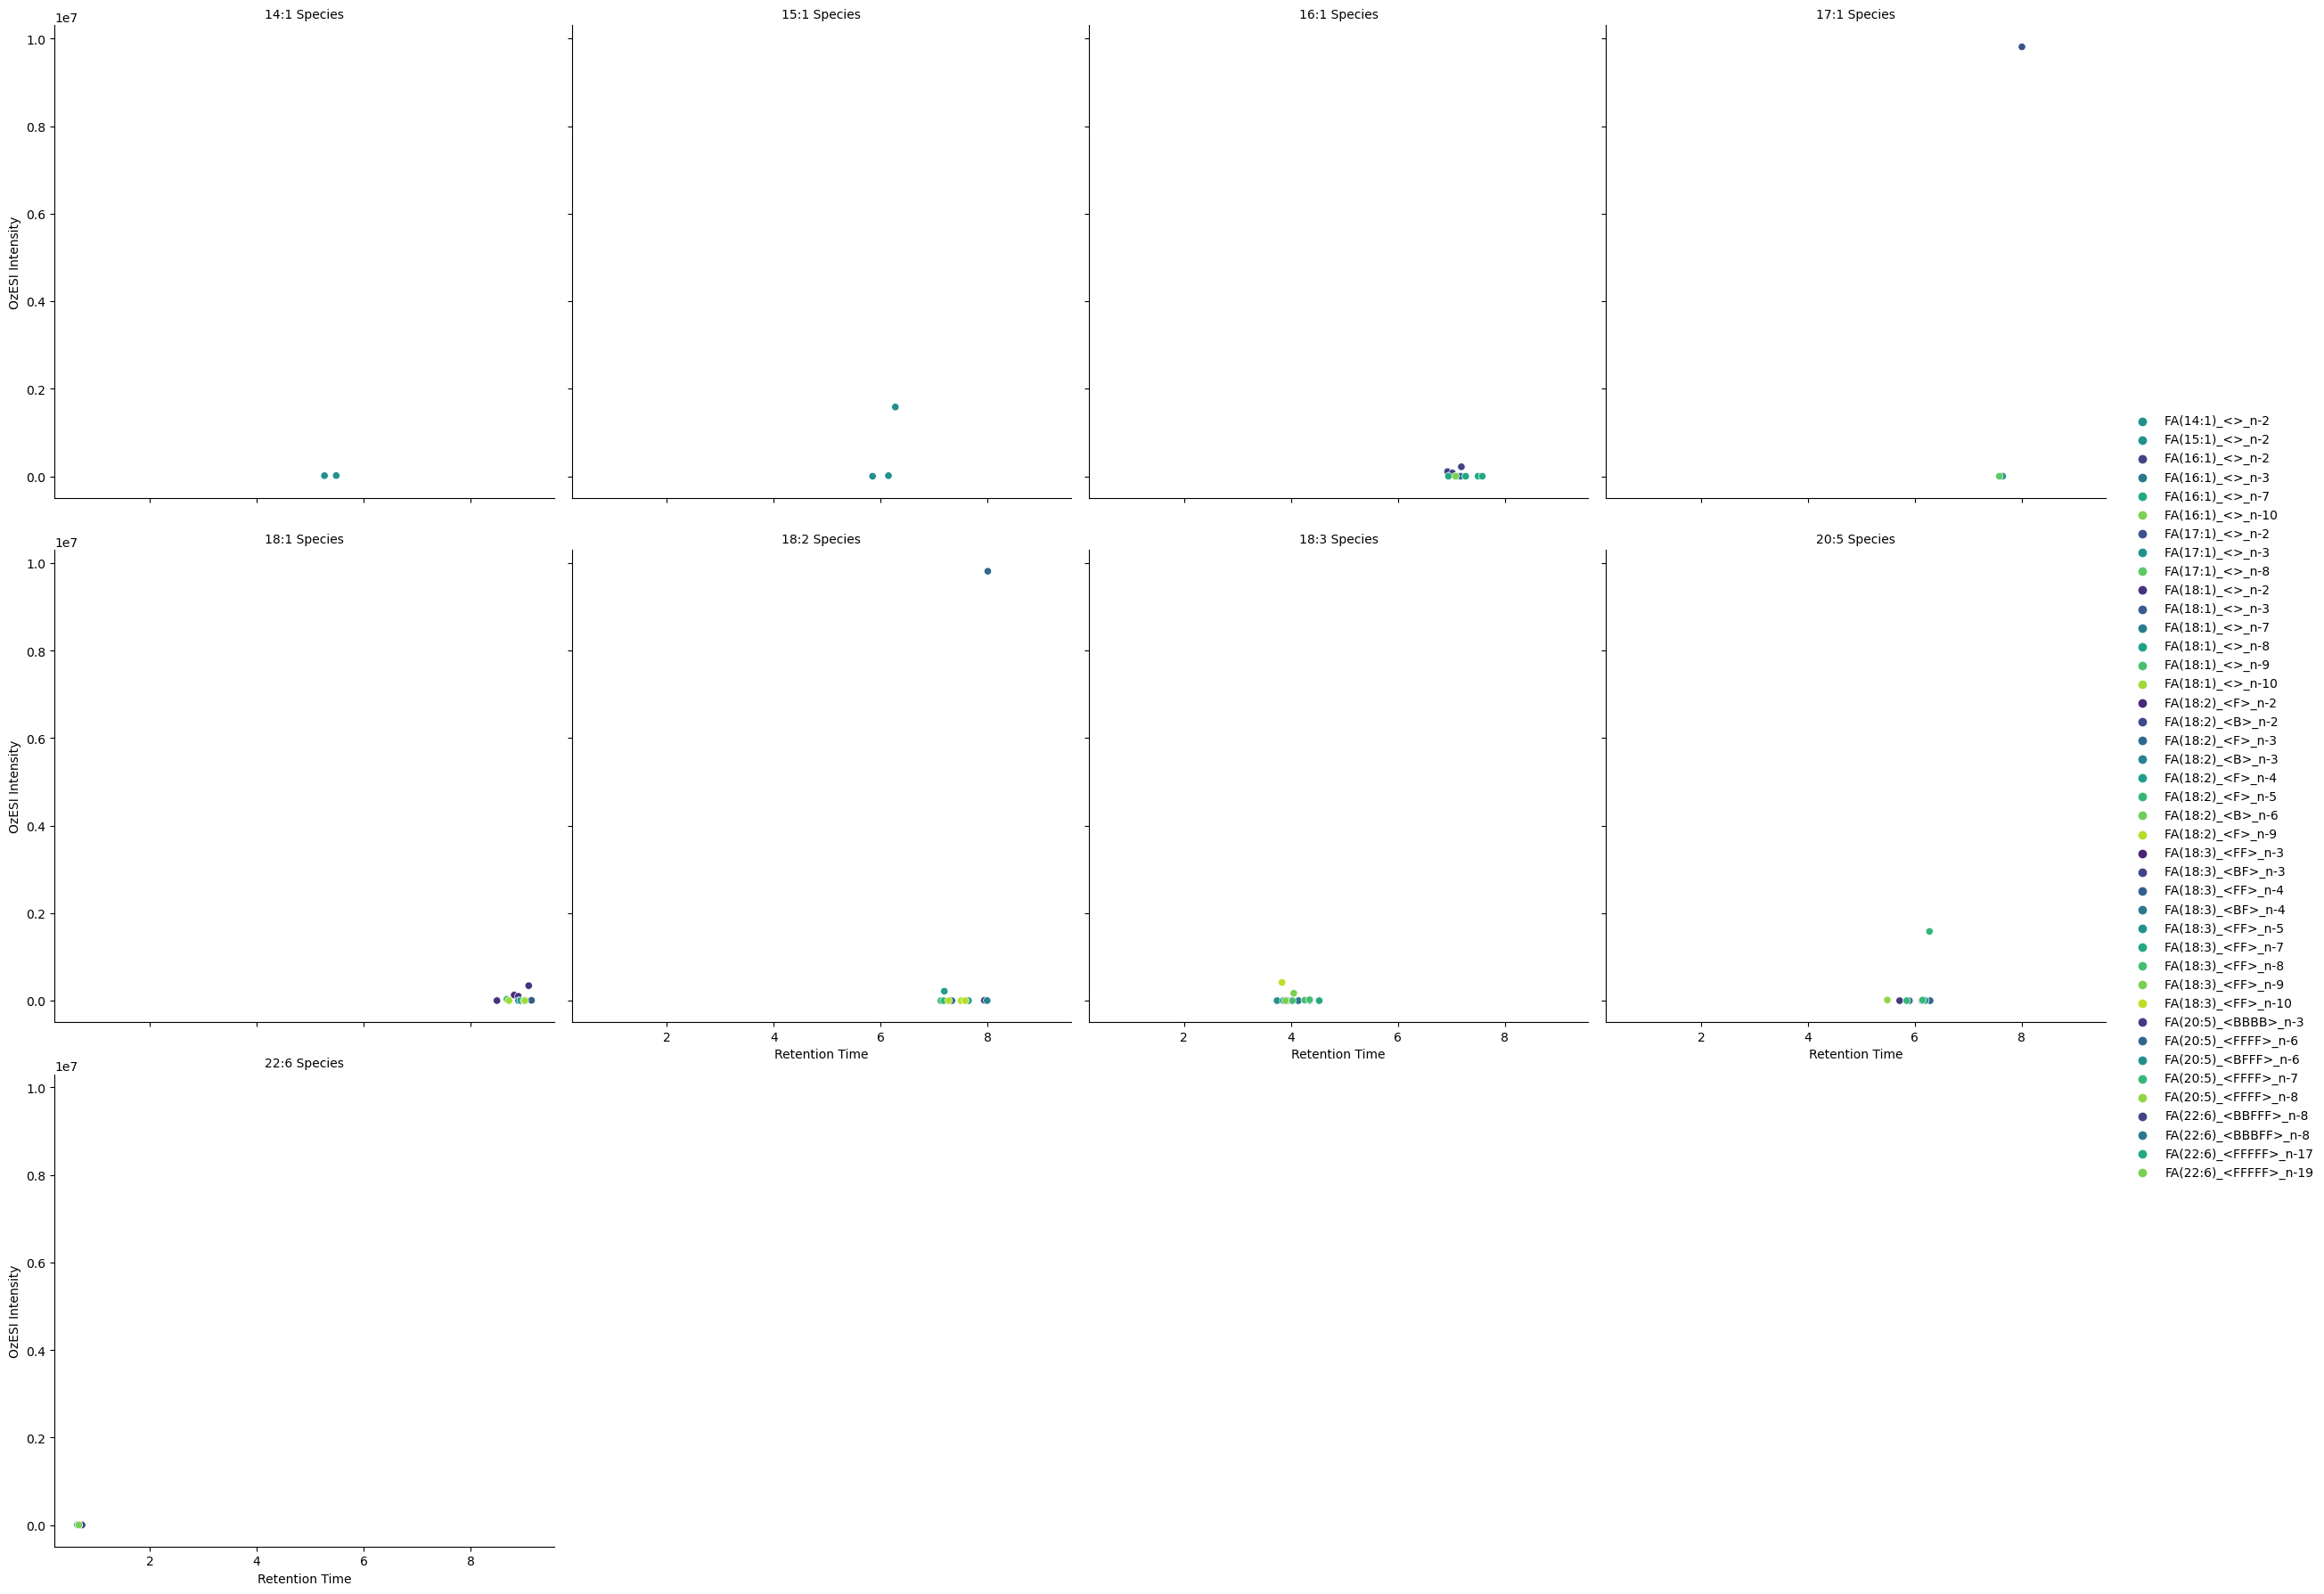

In [25]:
unique_retention_times_count = df_test['Retention_Time'].nunique()
print(f"Count of Unique Retention Times: {unique_retention_times_count}")

# Ensure 'Species' column exists and is correctly recognized
if 'Species' in df_test.columns:
    # Create a FacetGrid to separate plots by 'Species'
    g = sns.FacetGrid(df_test, col='Species', col_wrap=4, height=6)
    g.map(sns.scatterplot, 'Retention_Time', 'OzESI_Intensity', 'Lipid', palette='viridis')

    # Add titles and labels
    g.set_titles(col_template="{col_name} Species")
    g.set_axis_labels("Retention Time", "OzESI Intensity")
    g.add_legend()

    plt.show()
else:
    print("The 'Species' column does not exist in the dataset.")


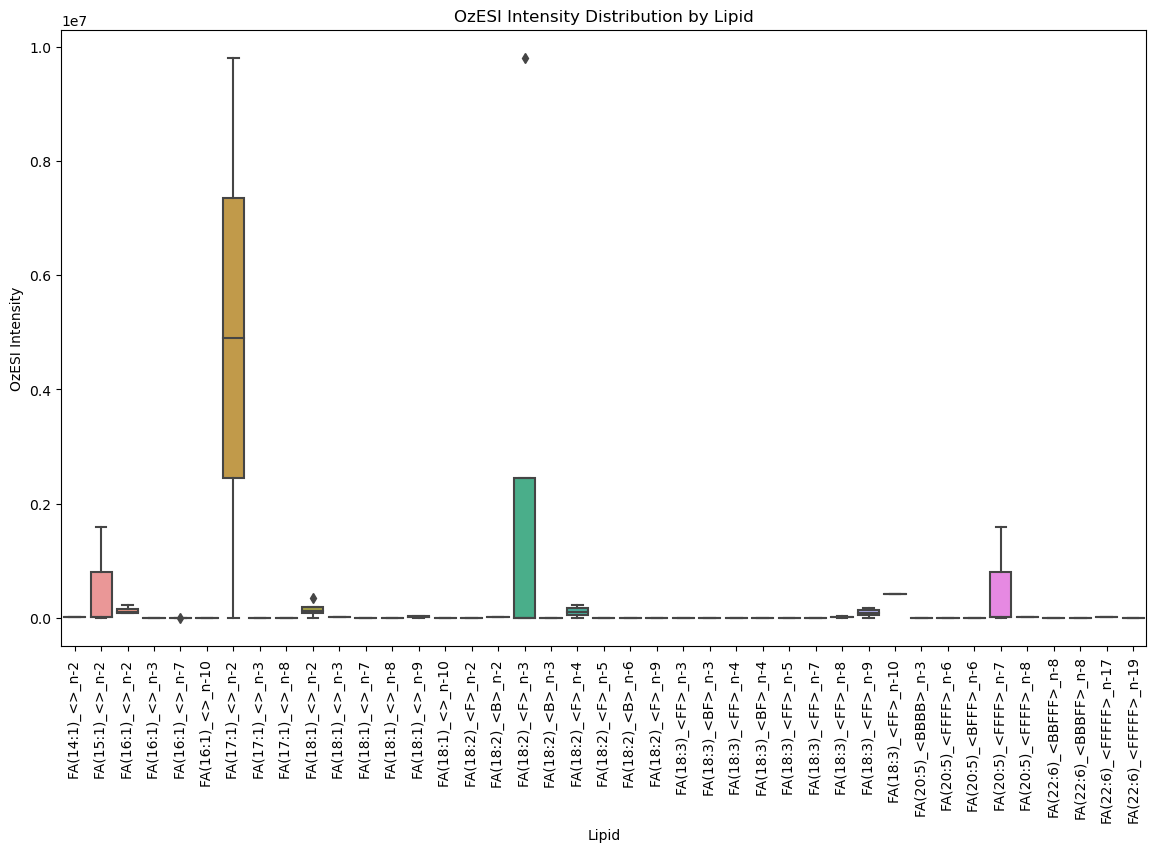

In [26]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_test, x='Lipid', y='OzESI_Intensity')
plt.title('OzESI Intensity Distribution by Lipid')
plt.xlabel('Lipid')
plt.ylabel('OzESI Intensity')
plt.xticks(rotation=90)
plt.show()


In [27]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Combine 'n_value' and 'n_value_pos' into a new column 'n_value_combined'
# df_test['n_value_combined'] = df_test['n_value'].astype(str) + df_test['n_value_pos']

# # Aggregate the data to get the maximum intensity for each combination
# df_max = df_test.groupby(['Species', 'n_value_combined', 'Lipid'])['OzESI_Intensity'].max().reset_index()

# # Ensure 'Species' column exists and is correctly recognized
# if 'Species' in df_test.columns:
#     # Create a FacetGrid to separate plots by 'Species'
#     g = sns.FacetGrid(df_max, col='Species', col_wrap=4, height=6, sharey=False)
    
#     # Map the barplot to each facet, separated by 'n_value_combined' on the x-axis
#     g.map_dataframe(sns.barplot, x='n_value_combined', y='OzESI_Intensity', hue='Lipid', palette='viridis')
    
#     # Add titles and labels
#     g.set_titles(col_template="{col_name} Species")
#     g.set_axis_labels("n_value_combined", "Max OzESI Intensity")
    
#     for ax in g.axes.flatten():
#         ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
#     g.add_legend()
#     plt.show()
# else:
#     print("The 'Species' column does not exist in the dataset.")


In [28]:
import pandas as pd
import re

def add_combined_n_value_columns(df):
    # Define a function to extract the value inside <> including the brackets
    def extract_n_value_pos(lipid):
        match = re.search(r'<.*?>', lipid)
        return match.group(0) if match else ''
    
    # Apply the function to the 'Lipid' column and create the new column 'n_value_pos'
    df['n_value_pos'] = df['Lipid'].apply(extract_n_value_pos)
    
    # Combine 'n_value' and 'n_value_pos' into a new column 'n_value_combined'
    df['n_value_combined'] = df['n_value'].astype(str) + df['n_value_pos']
    
    return df

# Example usage:
df_test = add_combined_n_value_columns(test_plot)


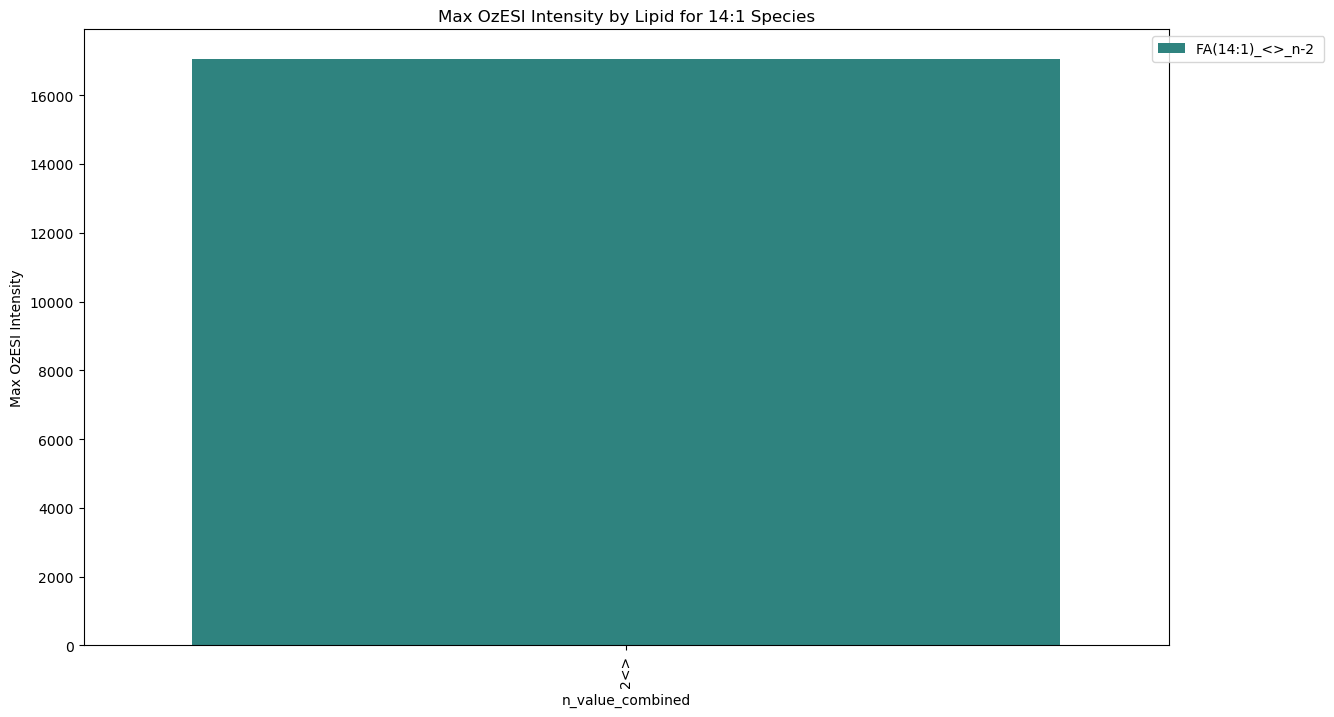

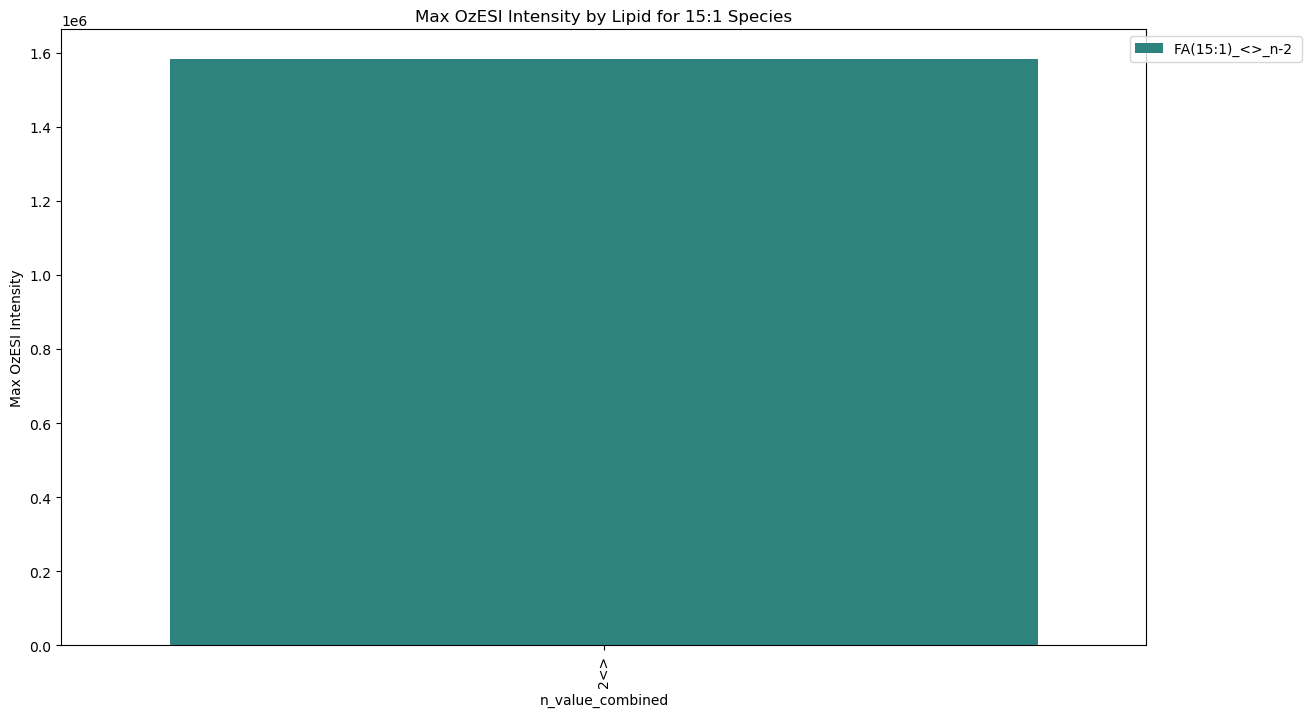

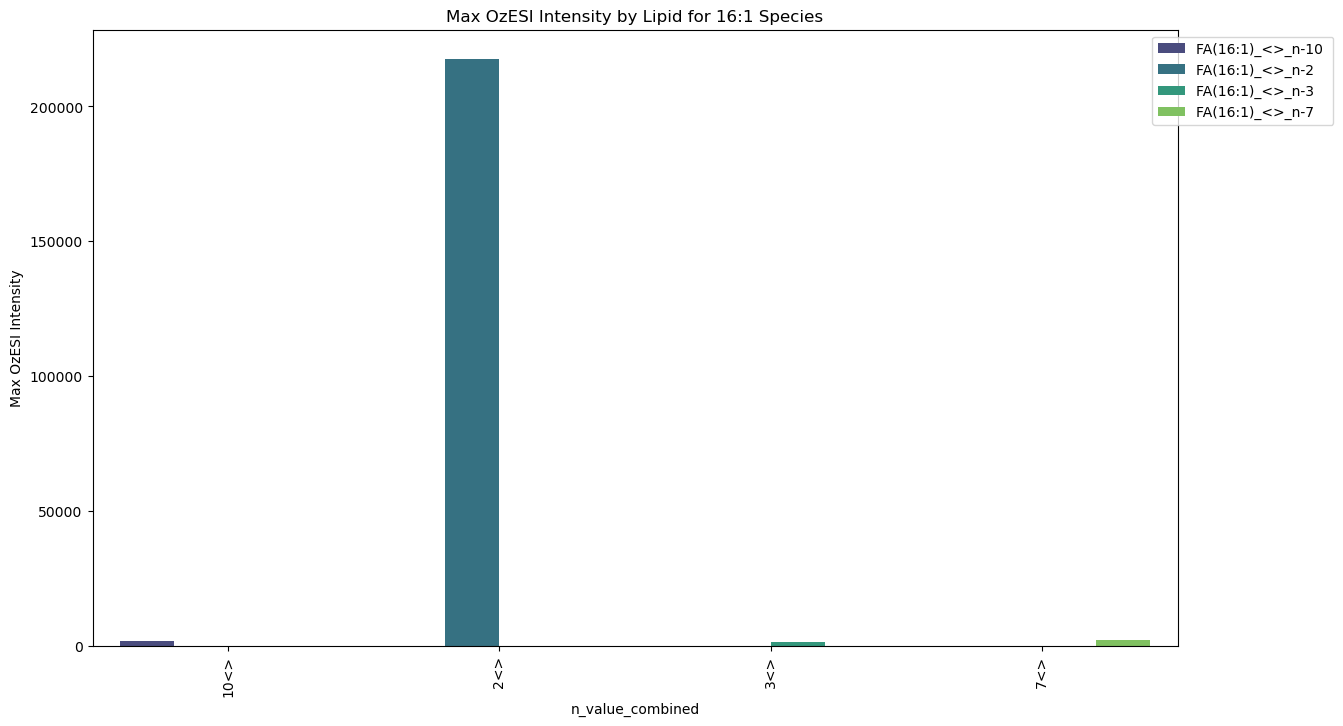

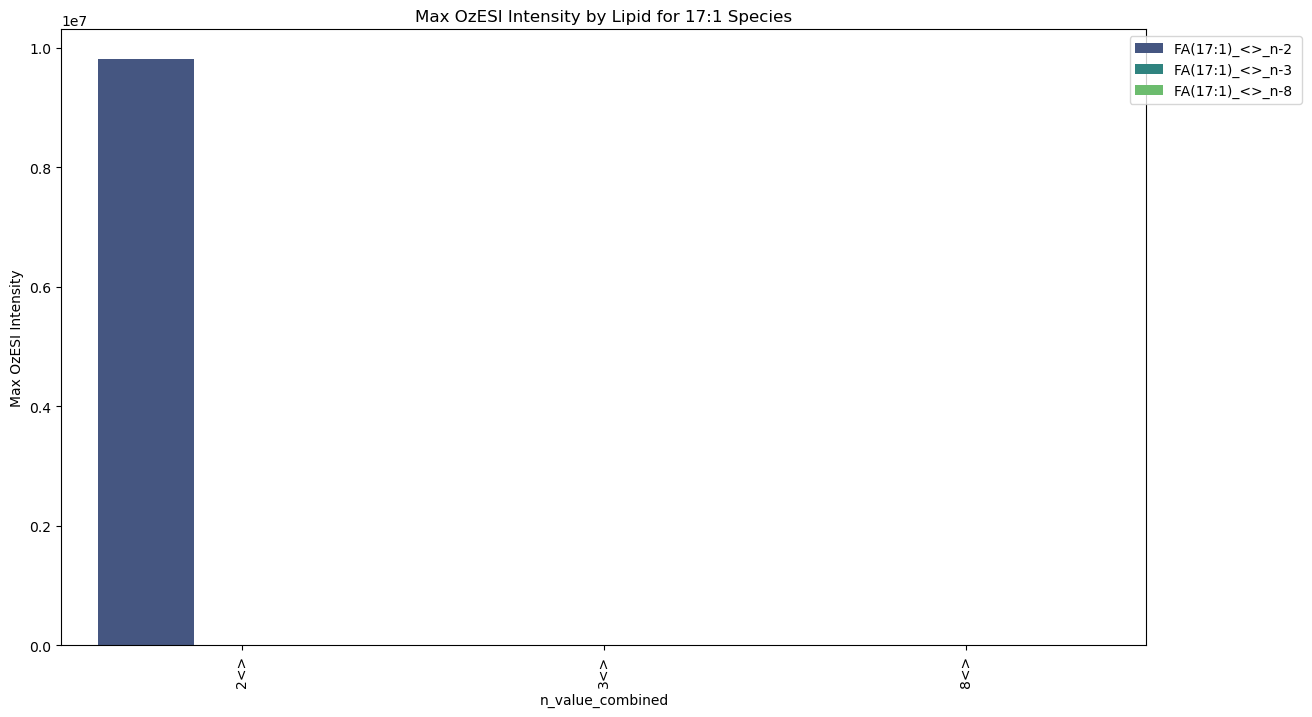

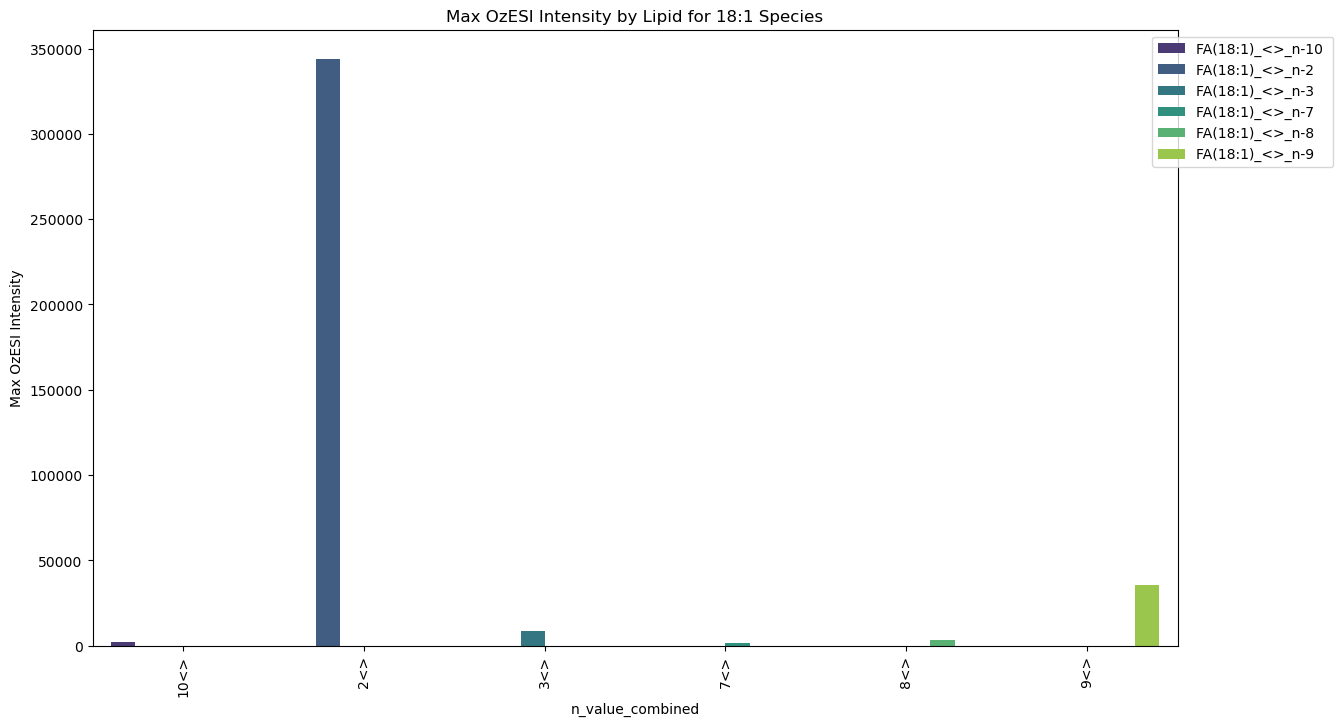

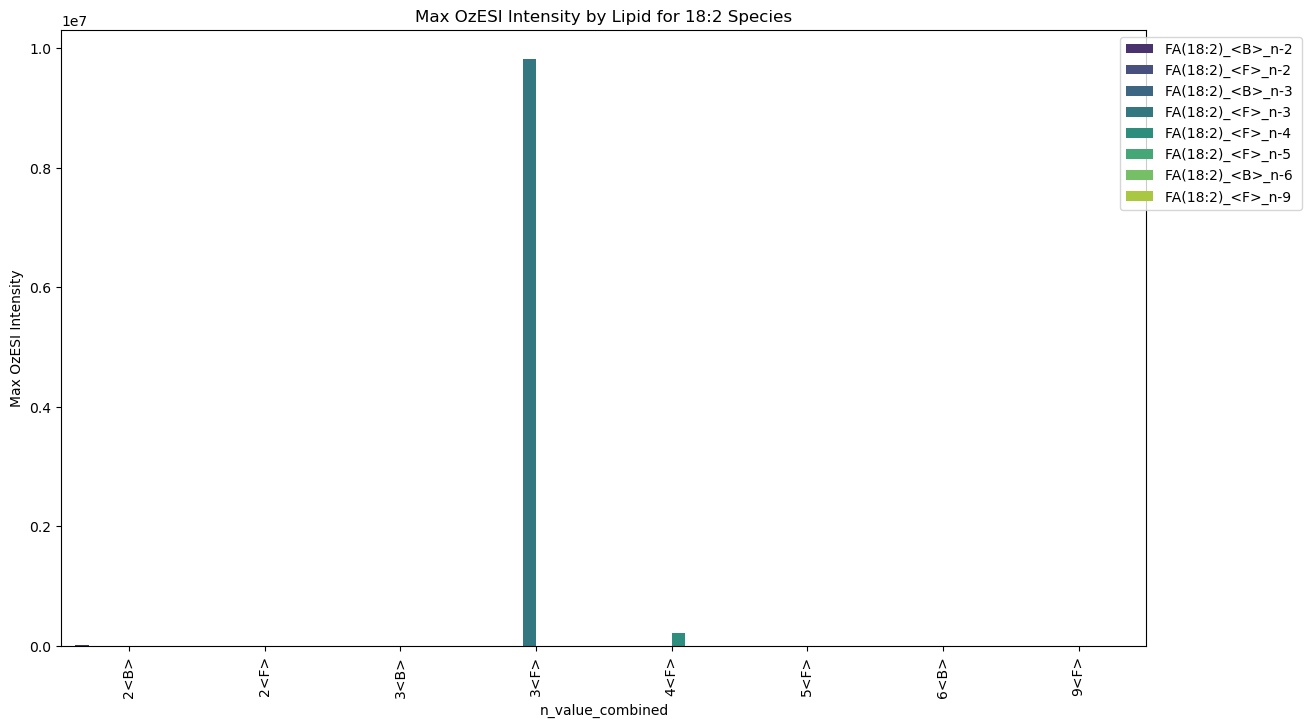

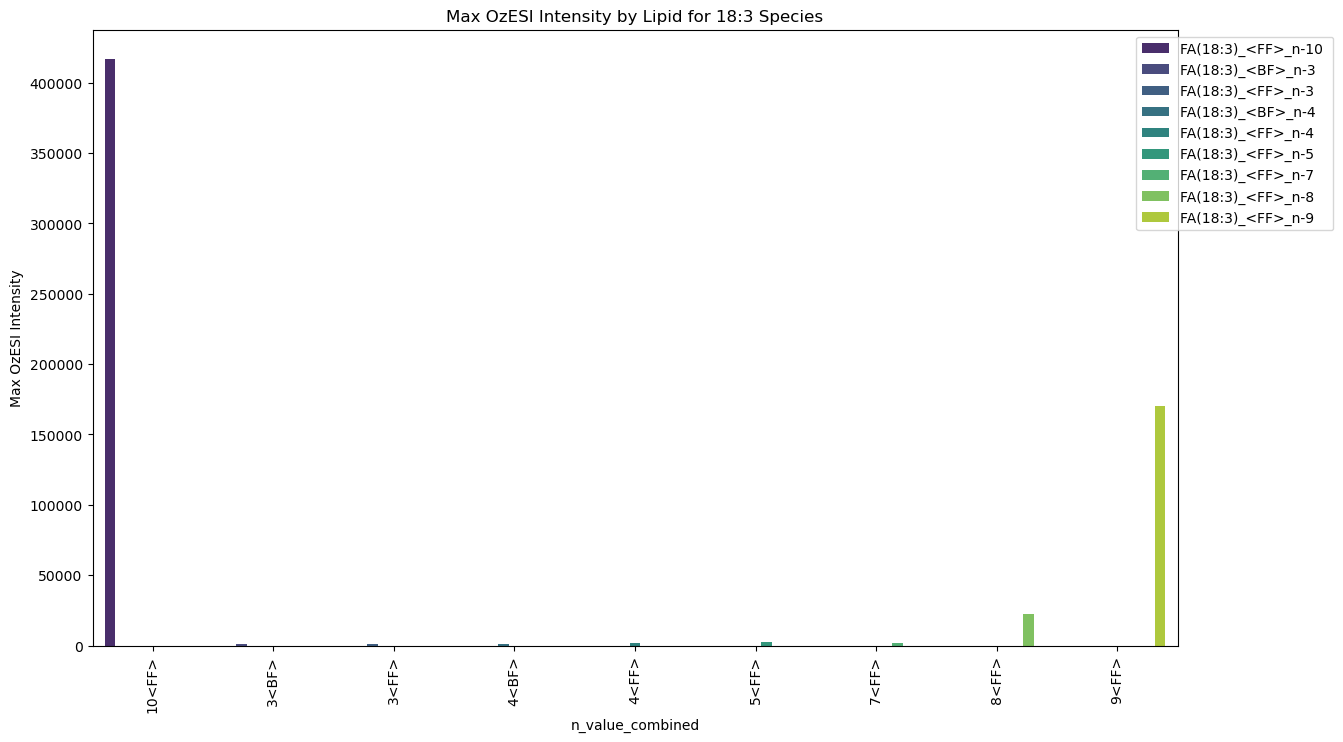

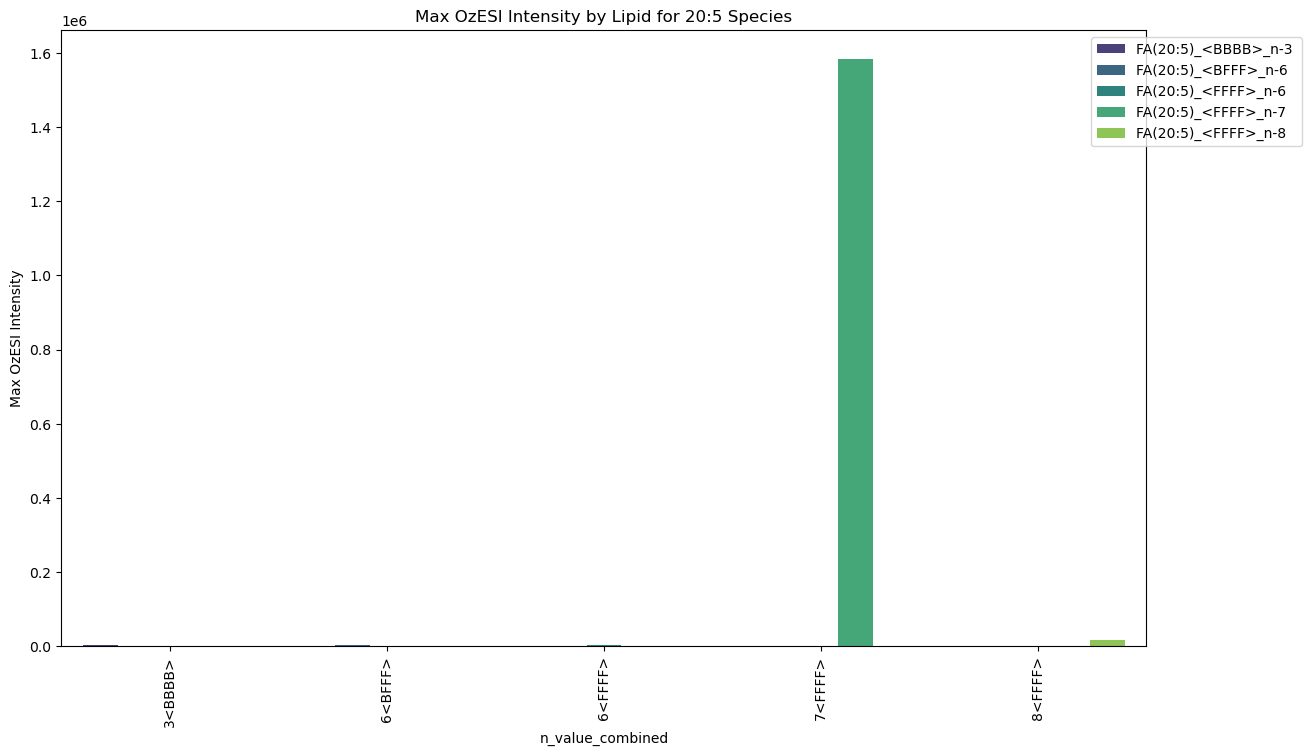

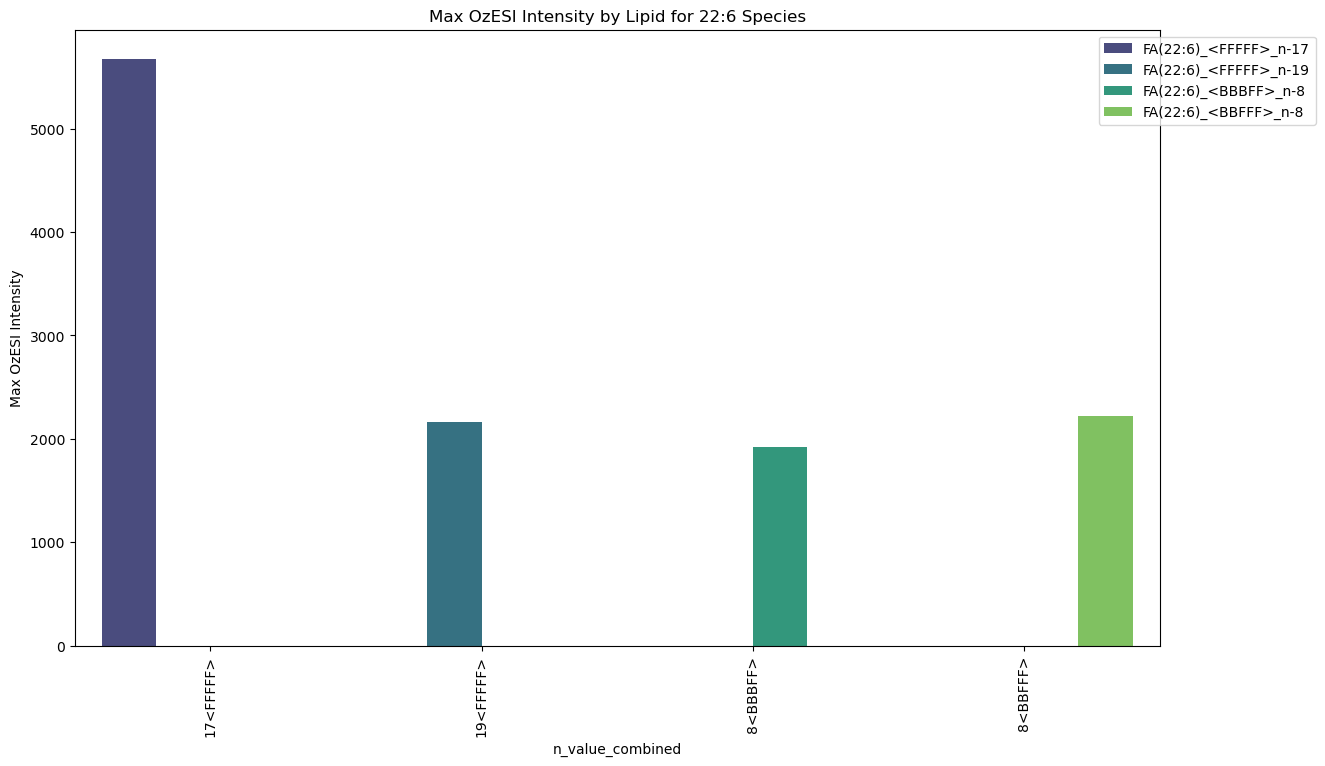

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine 'n_value' and 'n_value_pos' into a new column 'n_value_combined'
df_test['n_value_combined'] = df_test['n_value'].astype(str) + df_test['n_value_pos']

# Ensure 'Species' column exists and is correctly recognized
if 'Species' in df_test.columns:
    unique_species = df_test['Species'].unique()
    
    for species in unique_species:
        # Filter data for the current species
        species_data = df_test[df_test['Species'] == species]
        
        # Aggregate to get the maximum intensity for each n_value_combined and Lipid
        species_data_max = species_data.groupby(['n_value_combined', 'Lipid'])['OzESI_Intensity'].max().reset_index()
        
        # Get the unique combined n_values for ordering
        unique_n_values = sorted(species_data_max['n_value_combined'].unique())
        
        # Create a bar plot for the current species
        plt.figure(figsize=(14, 8))
        sns.barplot(data=species_data_max, x='n_value_combined', y='OzESI_Intensity', hue='Lipid', palette='viridis', order=unique_n_values)
        plt.title(f'Max OzESI Intensity by Lipid for {species} Species')
        plt.xlabel('n_value_combined')
        plt.ylabel('Max OzESI Intensity')
        plt.xticks(rotation=90)
        plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        plt.show()
else:
    print("The 'Species' column does not exist in the dataset.")


No data available for 14:1 within the specified intensity threshold.


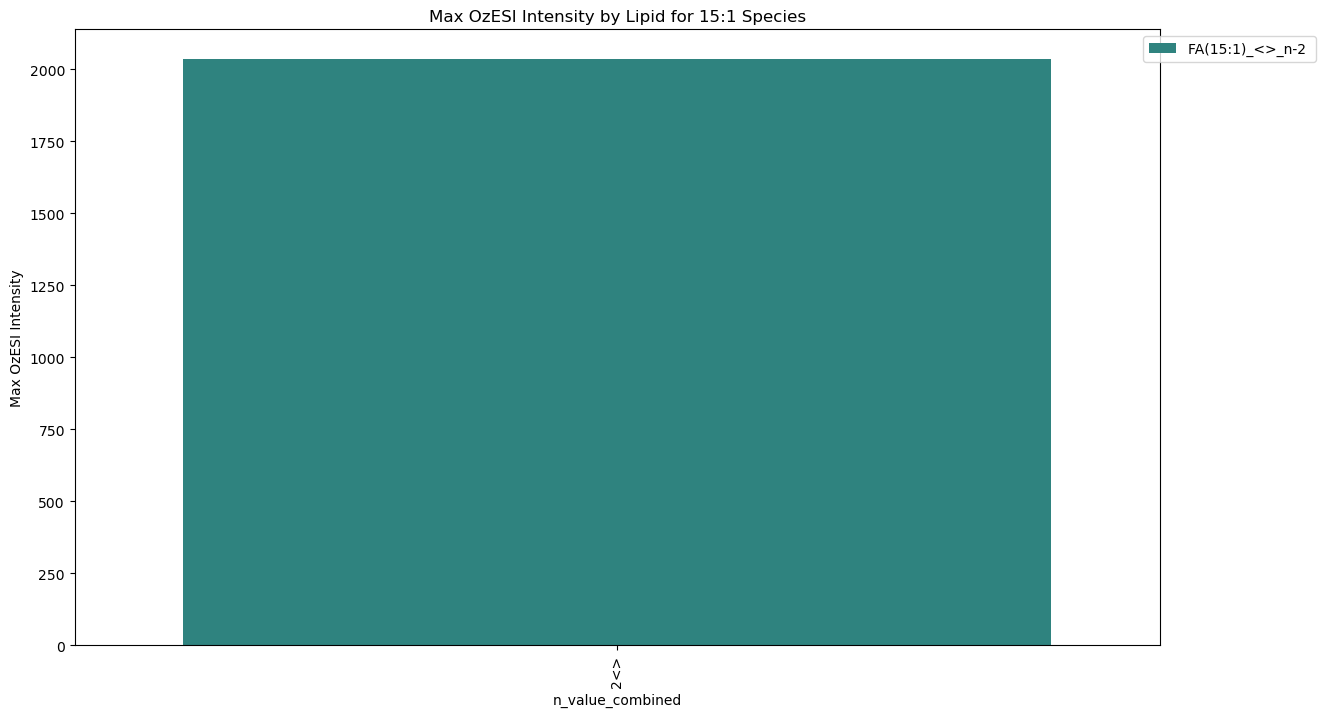

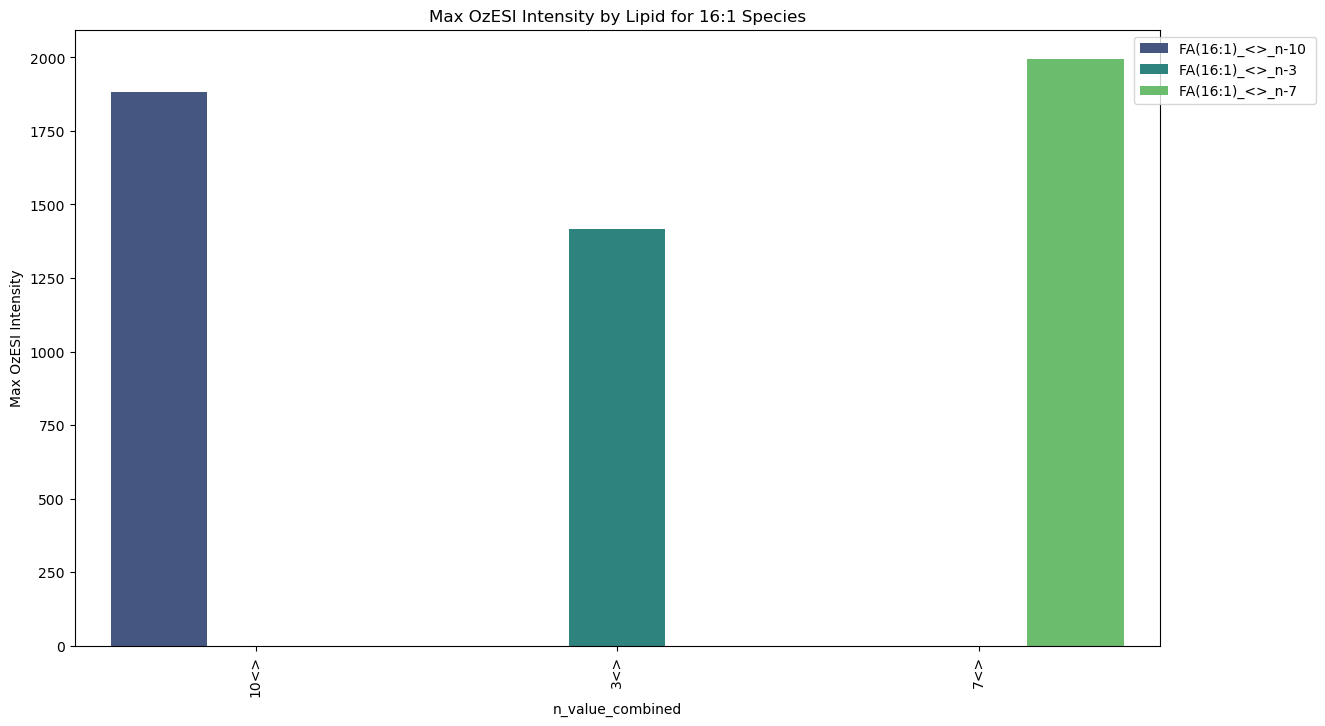

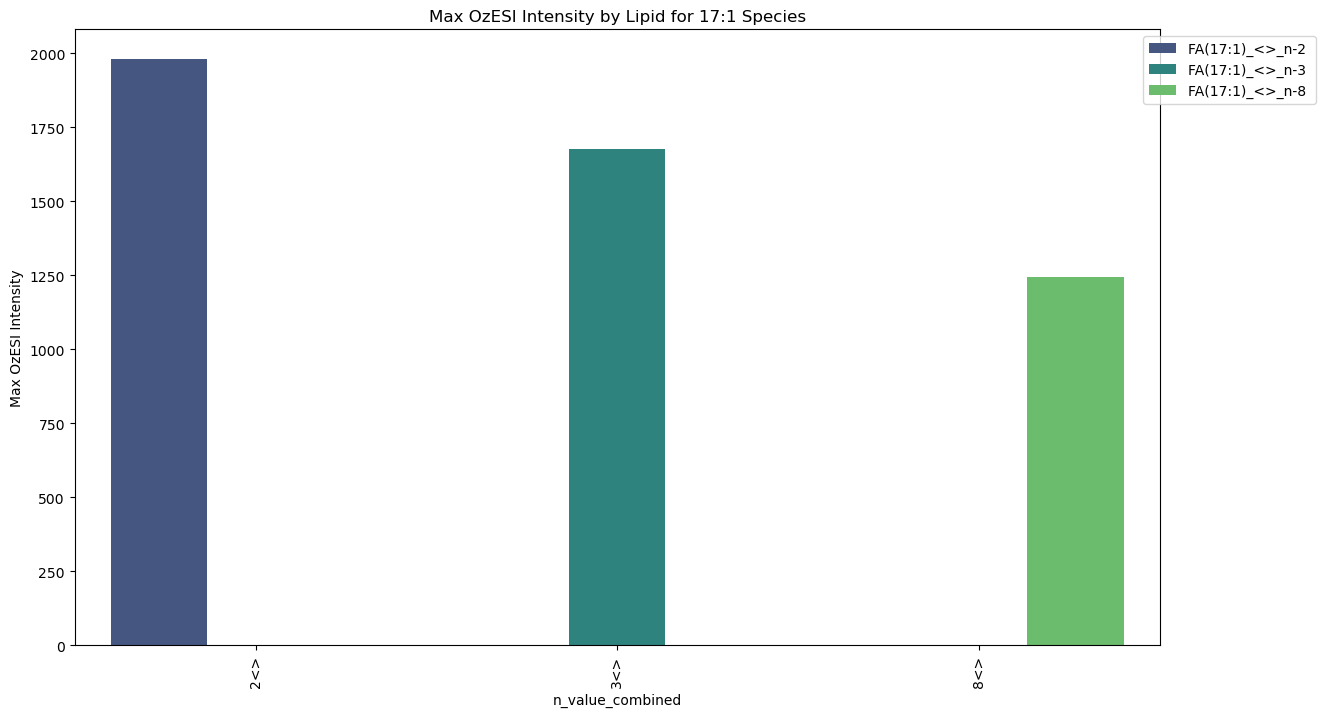

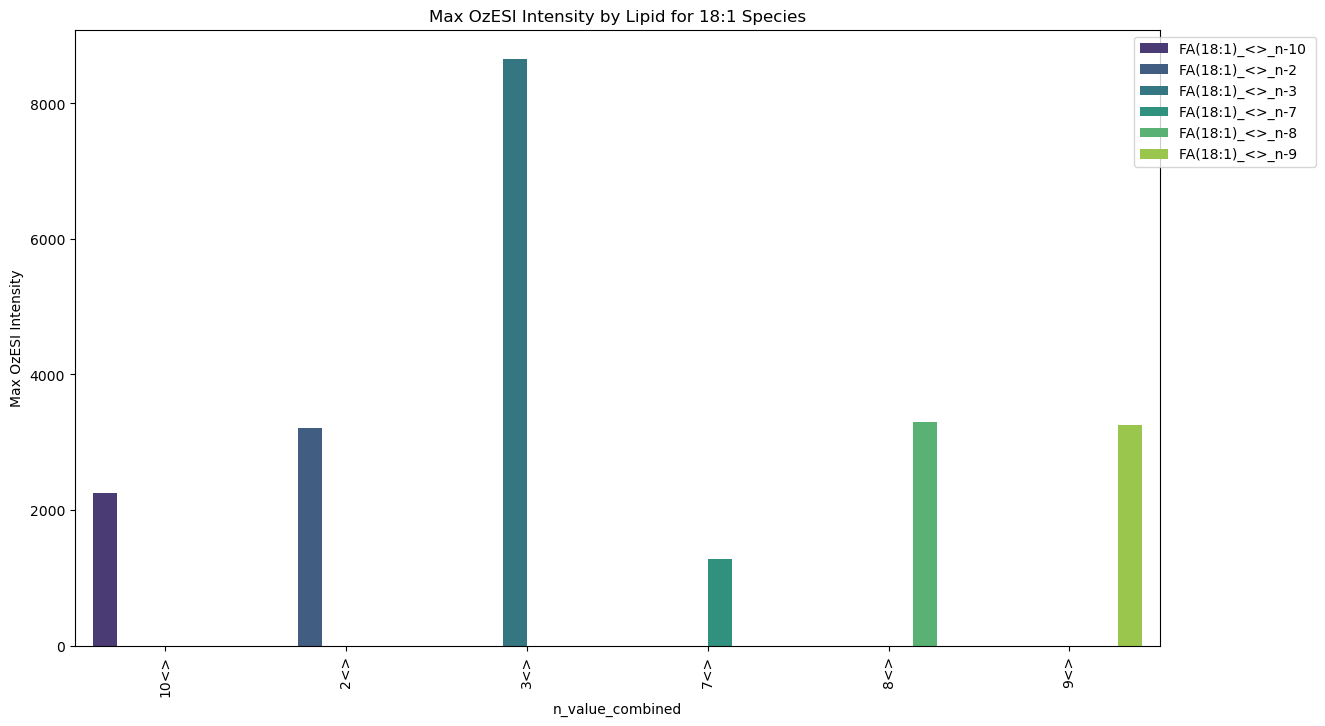

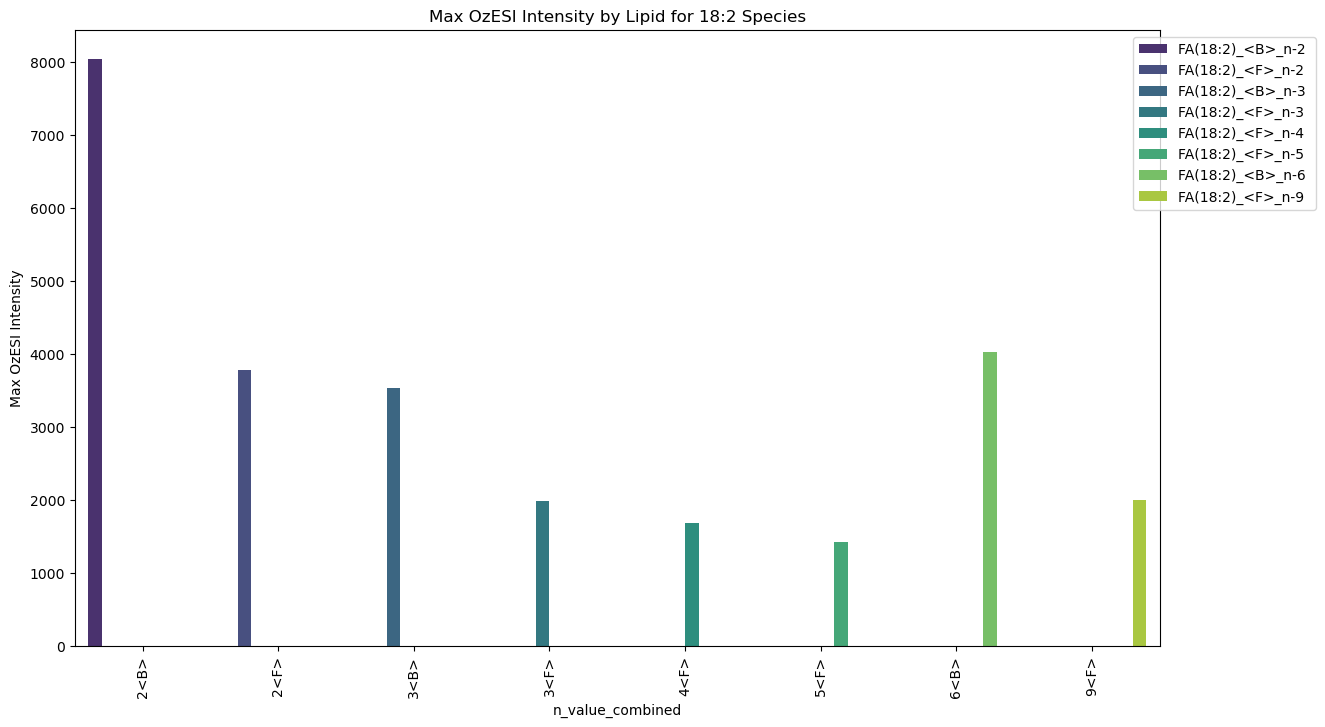

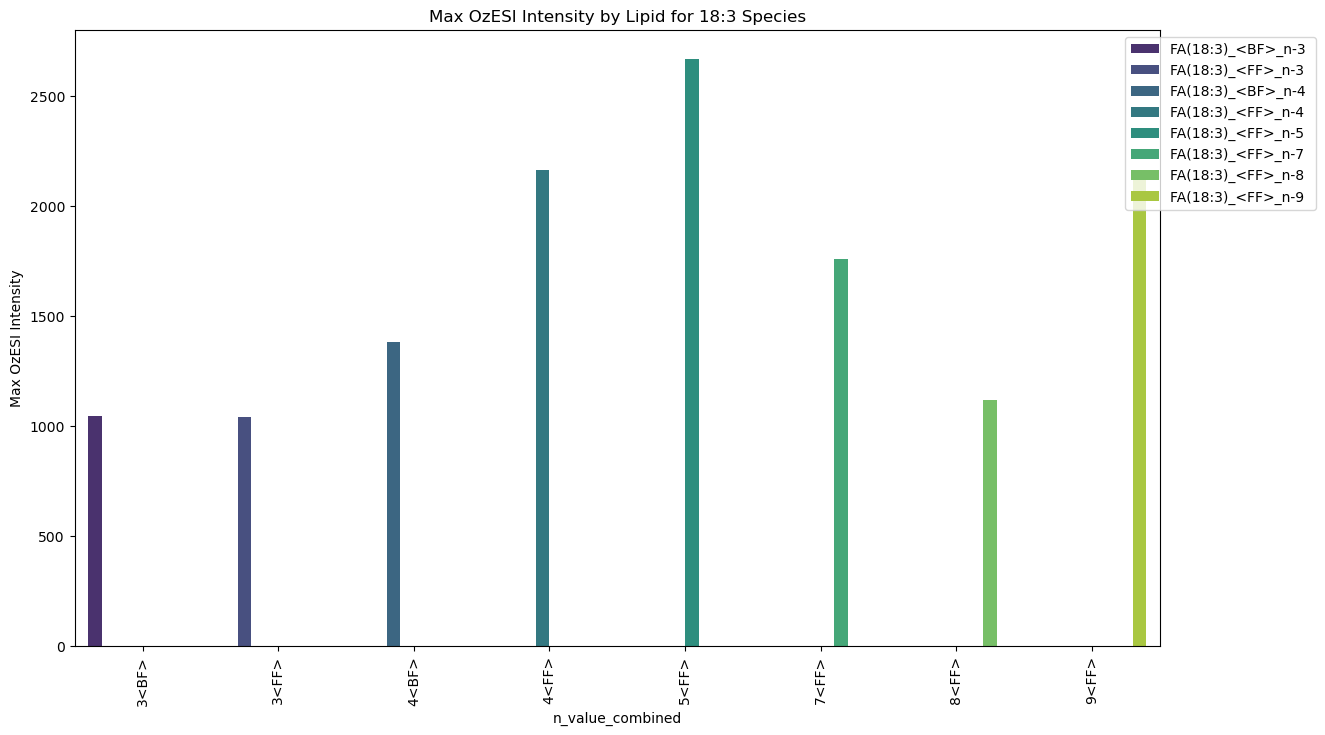

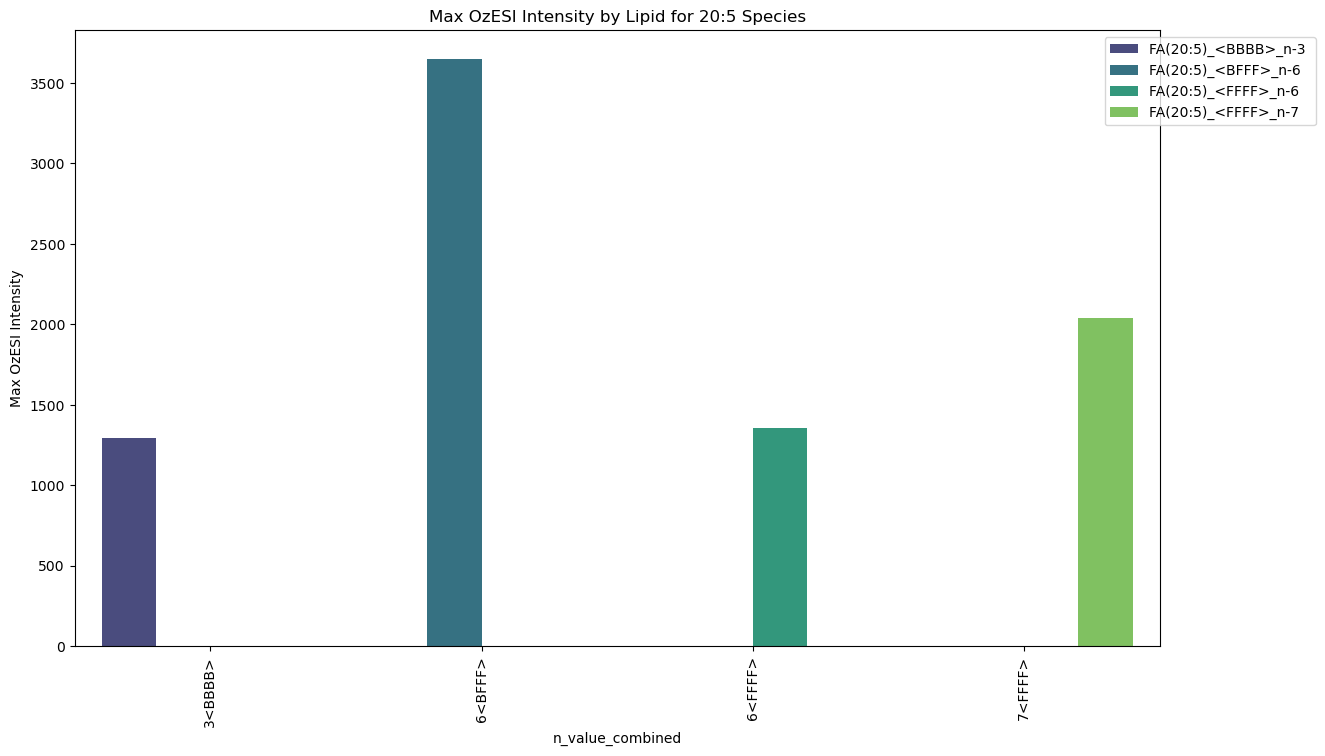

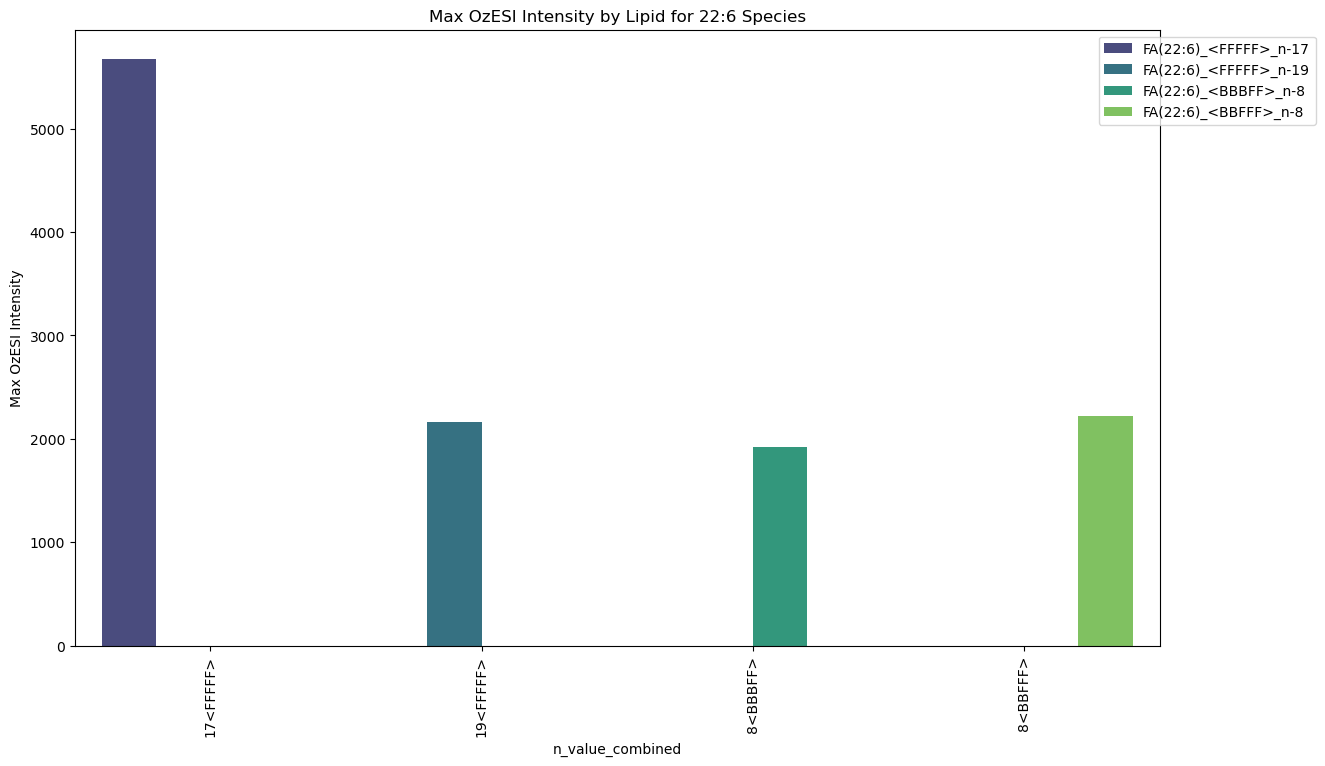

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine 'n_value' and 'n_value_pos' into a new column 'n_value_combined'
df_test['n_value_combined'] = df_test['n_value'].astype(str) + df_test['n_value_pos']

# Define intensity thresholds
min_intensity = 10
max_intensity = 10000

# Ensure 'Species' column exists and is correctly recognized
if 'Species' in df_test.columns:
    unique_species = df_test['Species'].unique()
    
    for species in unique_species:
        # Filter data for the current species
        species_data = df_test[df_test['Species'] == species]
        
        # Apply intensity threshold
        species_data = species_data[(species_data['OzESI_Intensity'] >= min_intensity) & (species_data['OzESI_Intensity'] <= max_intensity)]
        
        # Check if the filtered data is not empty
        if species_data.empty:
            print(f"No data available for {species} within the specified intensity threshold.")
            continue
        
        # Aggregate to get the maximum intensity for each n_value_combined and Lipid
        species_data_max = species_data.groupby(['n_value_combined', 'Lipid'])['OzESI_Intensity'].max().reset_index()
        
        # Get the unique combined n_values for ordering
        unique_n_values = sorted(species_data_max['n_value_combined'].unique())
        
        # Create a bar plot for the current species
        plt.figure(figsize=(14, 8))
        sns.barplot(data=species_data_max, x='n_value_combined', y='OzESI_Intensity', hue='Lipid', palette='viridis', order=unique_n_values)
        plt.title(f'Max OzESI Intensity by Lipid for {species} Species')
        plt.xlabel('n_value_combined')
        plt.ylabel('Max OzESI Intensity')
        plt.xticks(rotation=90)
        plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        plt.show()
else:
    print("The 'Species' column does not exist in the dataset.")


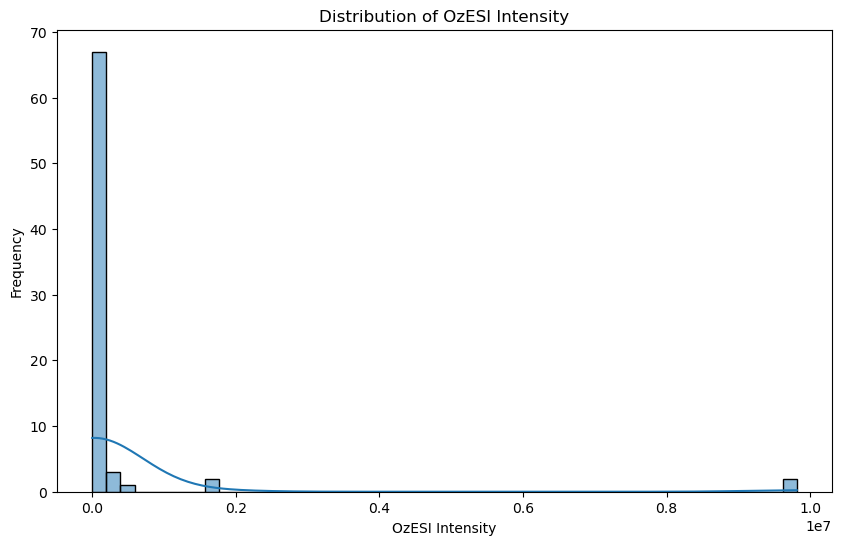

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(test_plot['OzESI_Intensity'], bins=50, kde=True)
plt.title('Distribution of OzESI Intensity')
plt.xlabel('OzESI Intensity')
plt.ylabel('Frequency')
plt.show()


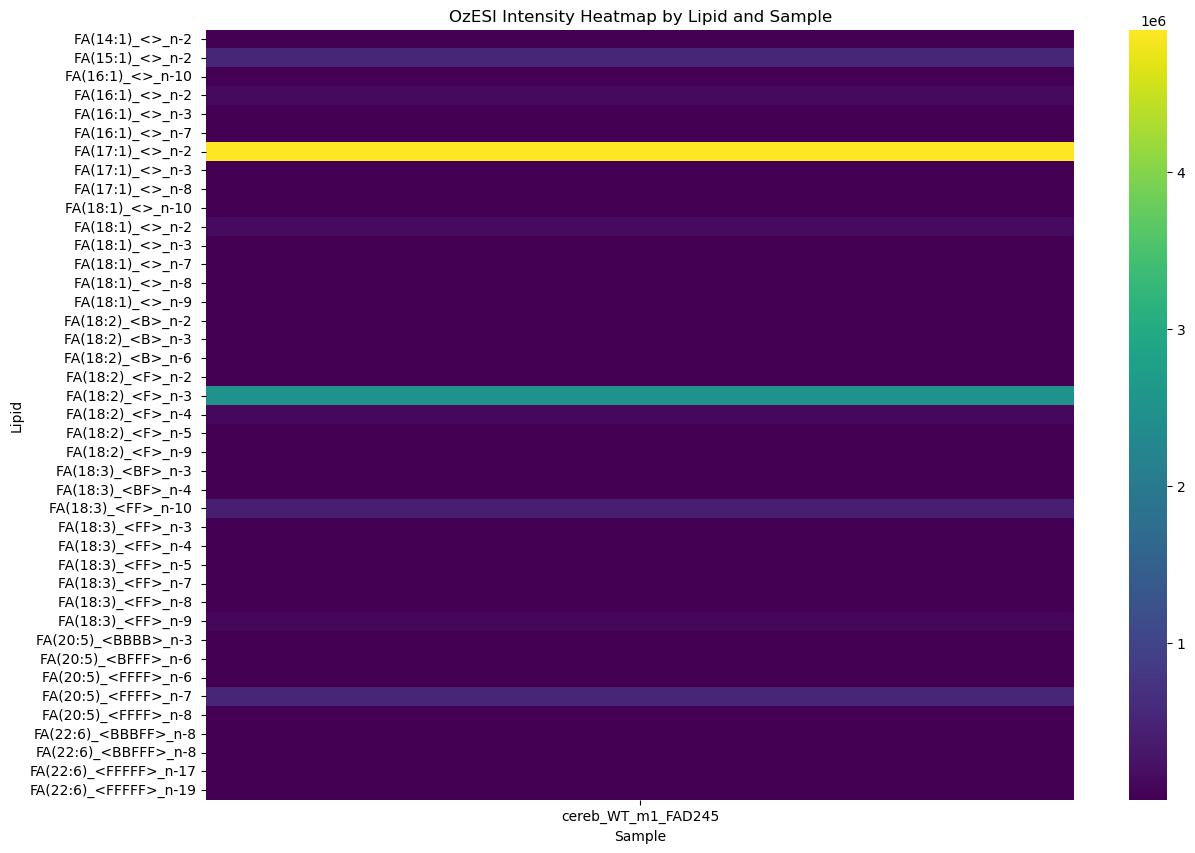

In [32]:
heatmap_data = test_plot.pivot_table(index='Lipid', columns='Sample', values='OzESI_Intensity')
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=False)
plt.title('OzESI Intensity Heatmap by Lipid and Sample')
plt.xlabel('Sample')
plt.ylabel('Lipid')
plt.show()


Unique Lipid values being plotted on the y-axis:
FA(14:1)_<>_n-2 
FA(15:1)_<>_n-2 
FA(16:1)_<>_n-2 
FA(16:1)_<>_n-3 
FA(16:1)_<>_n-7 
FA(16:1)_<>_n-10 
FA(17:1)_<>_n-2 
FA(17:1)_<>_n-3 
FA(17:1)_<>_n-8 
FA(18:1)_<>_n-2 
FA(18:1)_<>_n-3 
FA(18:1)_<>_n-7 
FA(18:1)_<>_n-8 
FA(18:1)_<>_n-9 
FA(18:1)_<>_n-10 
FA(18:2)_<F>_n-2 
FA(18:2)_<B>_n-2 
FA(18:2)_<F>_n-3 
FA(18:2)_<B>_n-3 
FA(18:2)_<F>_n-4 
FA(18:2)_<F>_n-5 
FA(18:2)_<B>_n-6 
FA(18:2)_<F>_n-9 
FA(18:3)_<FF>_n-3 
FA(18:3)_<BF>_n-3 
FA(18:3)_<FF>_n-4 
FA(18:3)_<BF>_n-4 
FA(18:3)_<FF>_n-5 
FA(18:3)_<FF>_n-7 
FA(18:3)_<FF>_n-8 
FA(18:3)_<FF>_n-9 
FA(18:3)_<FF>_n-10 
FA(20:5)_<BBBB>_n-3 
FA(20:5)_<FFFF>_n-6 
FA(20:5)_<BFFF>_n-6 
FA(20:5)_<FFFF>_n-7 
FA(20:5)_<FFFF>_n-8 
FA(22:6)_<BBFFF>_n-8
FA(22:6)_<BBBFF>_n-8
FA(22:6)_<FFFFF>_n-17
FA(22:6)_<FFFFF>_n-19
Heatmap data:
Sample                 cereb_WT_m1_FAD245
Lipid                                    
FA(14:1)_<>_n-2              1.584550e+04
FA(15:1)_<>_n-2              5.332567e+05
FA(16

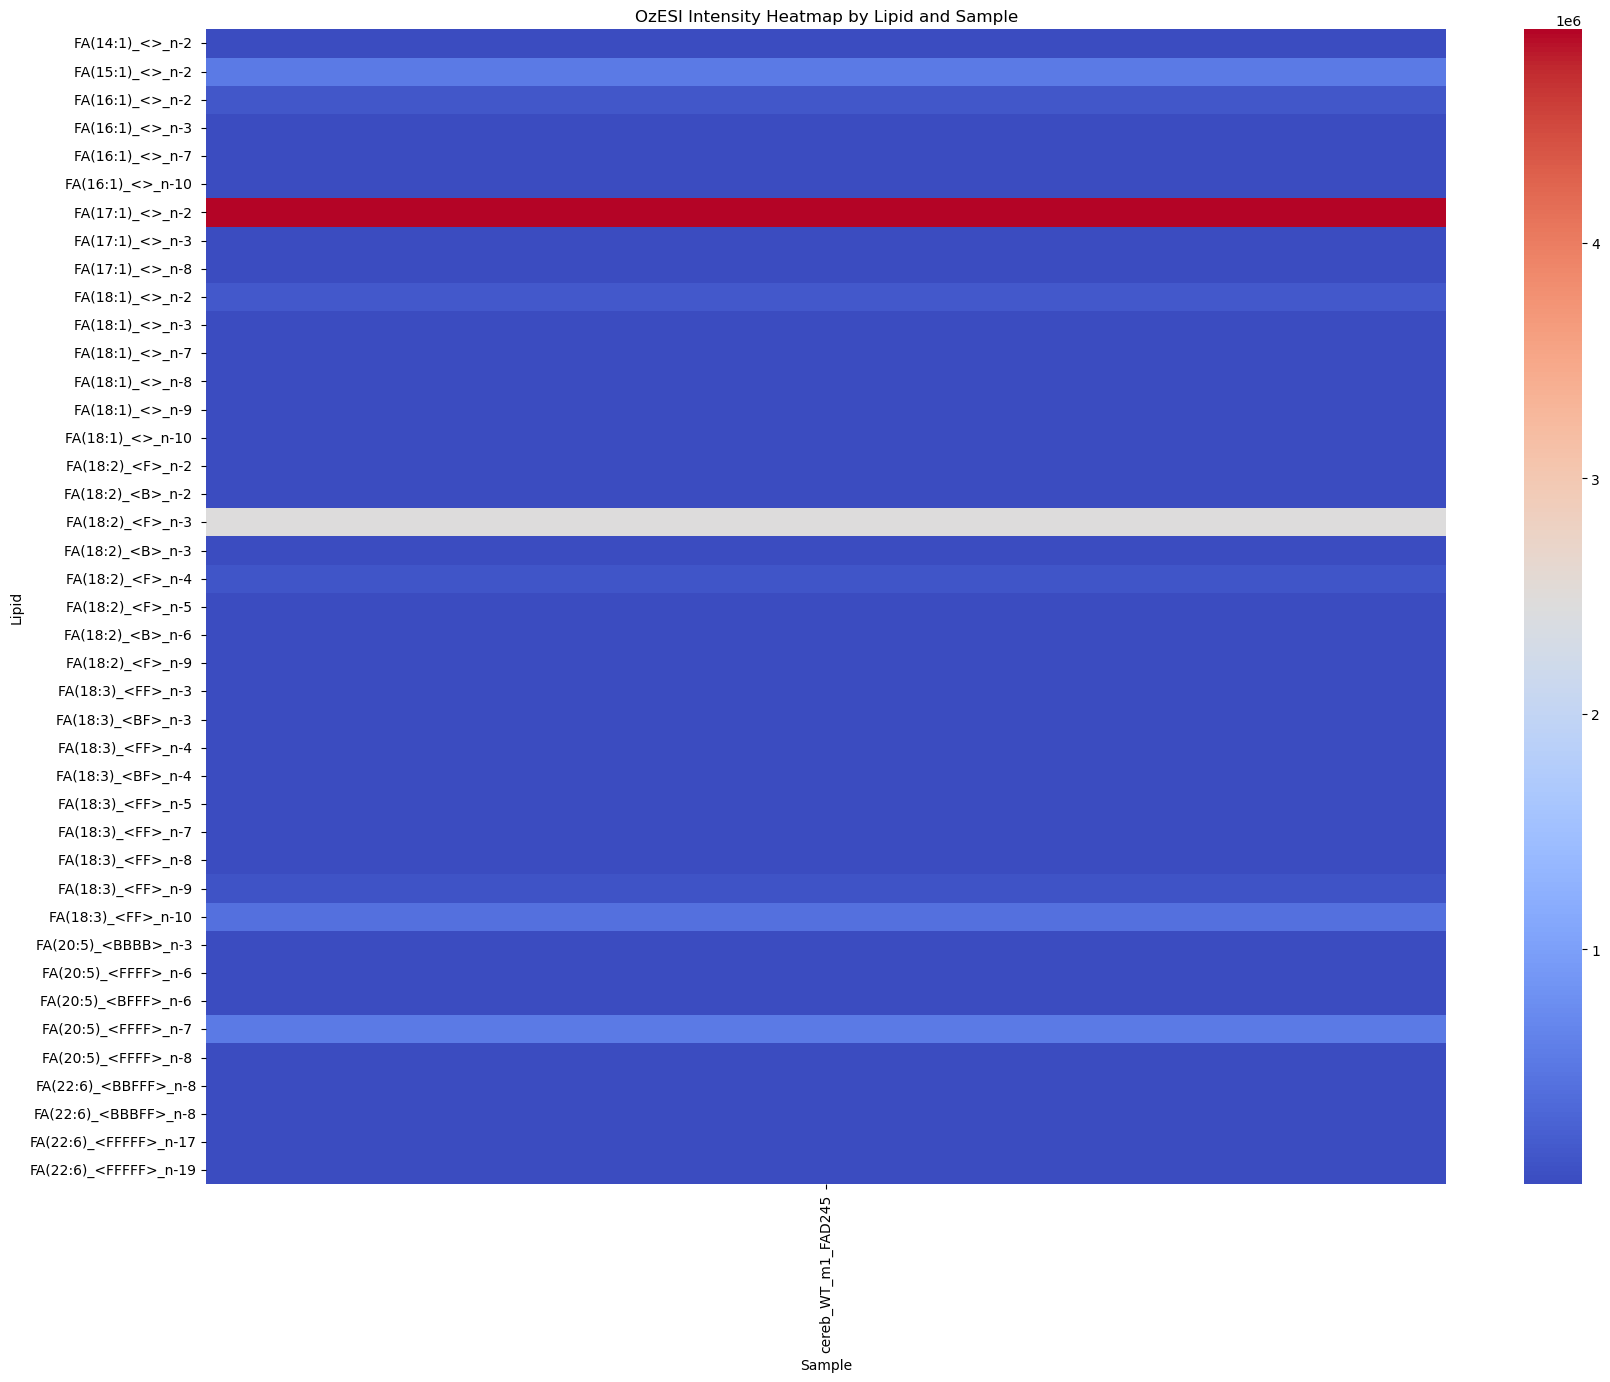

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to extract the numerical part of the Lipid for sorting
def extract_lipid_number(lipid):
    import re
    match = re.search(r'FA\((\d+):(\d+)\)', lipid)
    if match:
        # Create a tuple with the numeric parts to sort correctly
        return (int(match.group(1)), int(match.group(2)))
    return (float('inf'), float('inf'))

# Sample data creation (assuming df_test is your DataFrame)
# df_test = pd.DataFrame({
#     'Lipid': ['FA(10:1)_<>_n-2', 'FA(9:1)_<>_n-2', 'FA(8:1)_<>_n-2'],
#     'Sample': ['Sample1', 'Sample2', 'Sample1'],
#     'OzESI_Intensity': [3000, 5000, 7000]
# })

# Get unique Lipid values and sort them
unique_lipids = sorted(df_test['Lipid'].unique(), key=extract_lipid_number)

# Print the sorted unique lipid values
print("Unique Lipid values being plotted on the y-axis:")
for lipid in unique_lipids:
    print(lipid)

# Pivot the data to create a heatmap matrix
heatmap_data = df_test.pivot_table(index='Lipid', columns='Sample', values='OzESI_Intensity', aggfunc='mean')

# Print the pivoted heatmap data to inspect it
print("Heatmap data:")
print(heatmap_data)

# Reorder the rows of the pivot table
heatmap_data = heatmap_data.loc[unique_lipids]

# Create the heatmap without annotations and with a larger figure size
plt.figure(figsize=(20, 15))  # Increase the figure size
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)  # Set annot=False to not plot text values
plt.title('OzESI Intensity Heatmap by Lipid and Sample')
plt.xlabel('Sample')
plt.ylabel('Lipid')
plt.xticks(rotation=90)
plt.yticks(rotation=0)  # Set y-axis labels horizontal
plt.show()


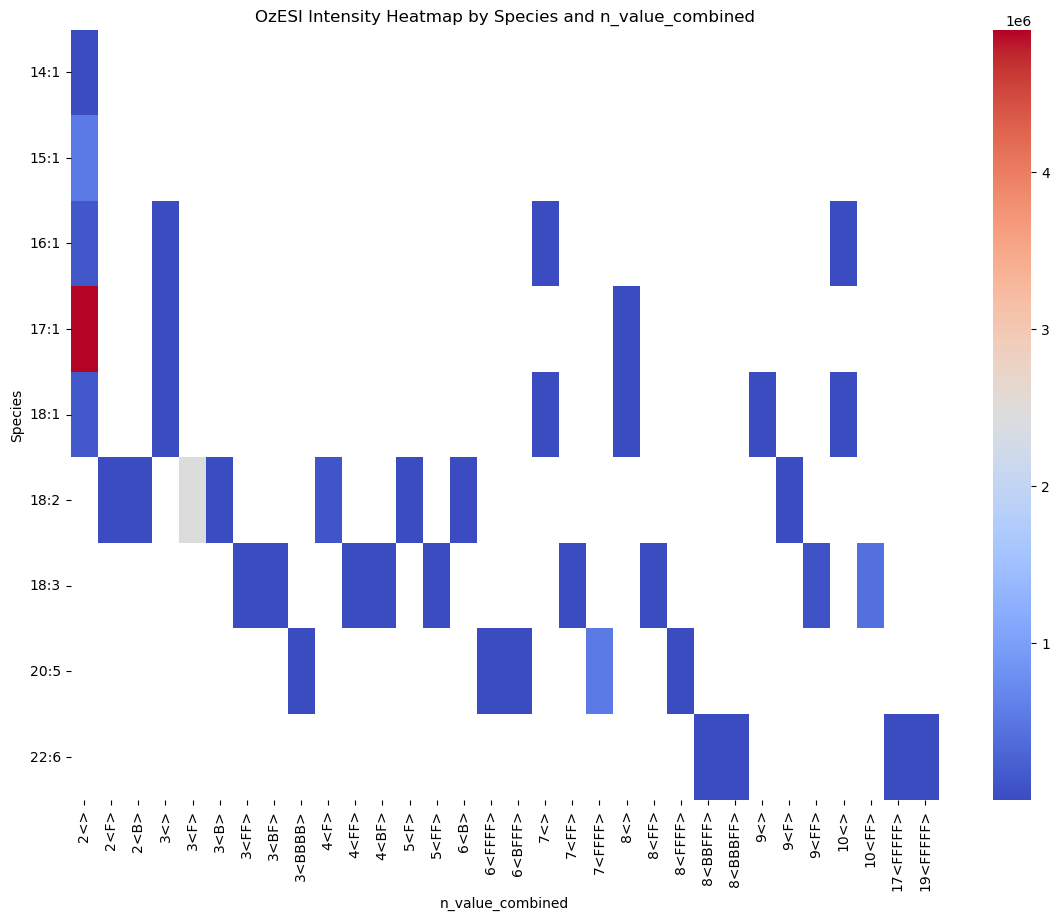

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine 'n_value' and 'n_value_pos' into a new column 'n_value_combined'
df_test['n_value_combined'] = df_test['n_value'].astype(str) + df_test['n_value_pos']

# Function to extract the number from 'n_value_combined'
def extract_number(n_value_combined):
    import re
    match = re.match(r'(\d+)', n_value_combined)
    return int(match.group(1)) if match else float('inf')

# Function to extract the number from 'Species'
def extract_species_number(species):
    import re
    match = re.match(r'(\d+)', species)
    return int(match.group(1)) if match else float('inf')

# Get unique n_value_combined values and sort them
unique_n_values_combined = sorted(df_test['n_value_combined'].unique(), key=extract_number)

# Get unique Species values and sort them
unique_species = sorted(df_test['Species'].unique(), key=extract_species_number)

# Pivot the data to create a heatmap matrix
heatmap_data = df_test.pivot_table(index='Species', columns='n_value_combined', values='OzESI_Intensity', aggfunc='mean')

# Reorder the columns and rows of the pivot table
heatmap_data = heatmap_data.loc[unique_species, unique_n_values_combined]

# Create the heatmap without annotations
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)  # Set annot=False to not plot text values
plt.title('OzESI Intensity Heatmap by Species and n_value_combined')
plt.xlabel('n_value_combined')
plt.ylabel('Species')
plt.xticks(rotation=90)
plt.yticks(rotation=0)  # Set y-axis labels horizontal
plt.show()


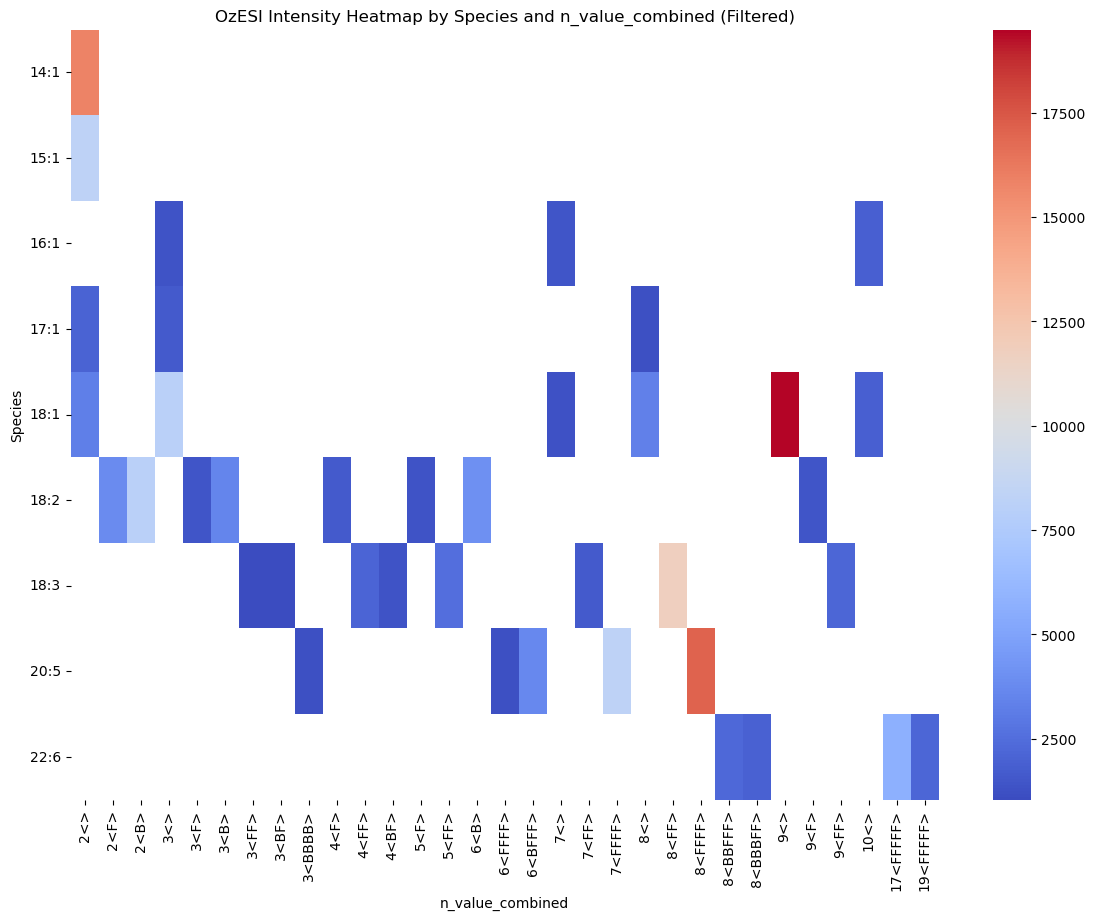

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine 'n_value' and 'n_value_pos' into a new column 'n_value_combined'
df_test['n_value_combined'] = df_test['n_value'].astype(str) + df_test['n_value_pos']

# Define the maximum intensity threshold
max_intensity_threshold = 50000  # Set your desired maximum threshold

# Filter out rows where OzESI_Intensity is above the threshold
df_filtered = df_test[df_test['OzESI_Intensity'] <= max_intensity_threshold]

# Function to extract the number from 'n_value_combined'
def extract_number(n_value_combined):
    import re
    match = re.match(r'(\d+)', n_value_combined)
    return int(match.group(1)) if match else float('inf')

# Function to extract the number from 'Species'
def extract_species_number(species):
    import re
    match = re.match(r'(\d+)', species)
    return int(match.group(1)) if match else float('inf')

# Get unique n_value_combined values and sort them
unique_n_values_combined = sorted(df_filtered['n_value_combined'].unique(), key=extract_number)

# Get unique Species values and sort them
unique_species = sorted(df_filtered['Species'].unique(), key=extract_species_number)

# Pivot the data to create a heatmap matrix
heatmap_data = df_filtered.pivot_table(index='Species', columns='n_value_combined', values='OzESI_Intensity', aggfunc='mean')

# Reorder the rows and columns of the pivot table
heatmap_data = heatmap_data.loc[unique_species, unique_n_values_combined]

# Create the heatmap without annotations
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)  # Set annot=False to not plot text values
plt.title('OzESI Intensity Heatmap by Species and n_value_combined (Filtered)')
plt.xlabel('n_value_combined')
plt.ylabel('Species')
plt.xticks(rotation=90)
plt.yticks(rotation=0)  # Set y-axis labels horizontal
plt.show()


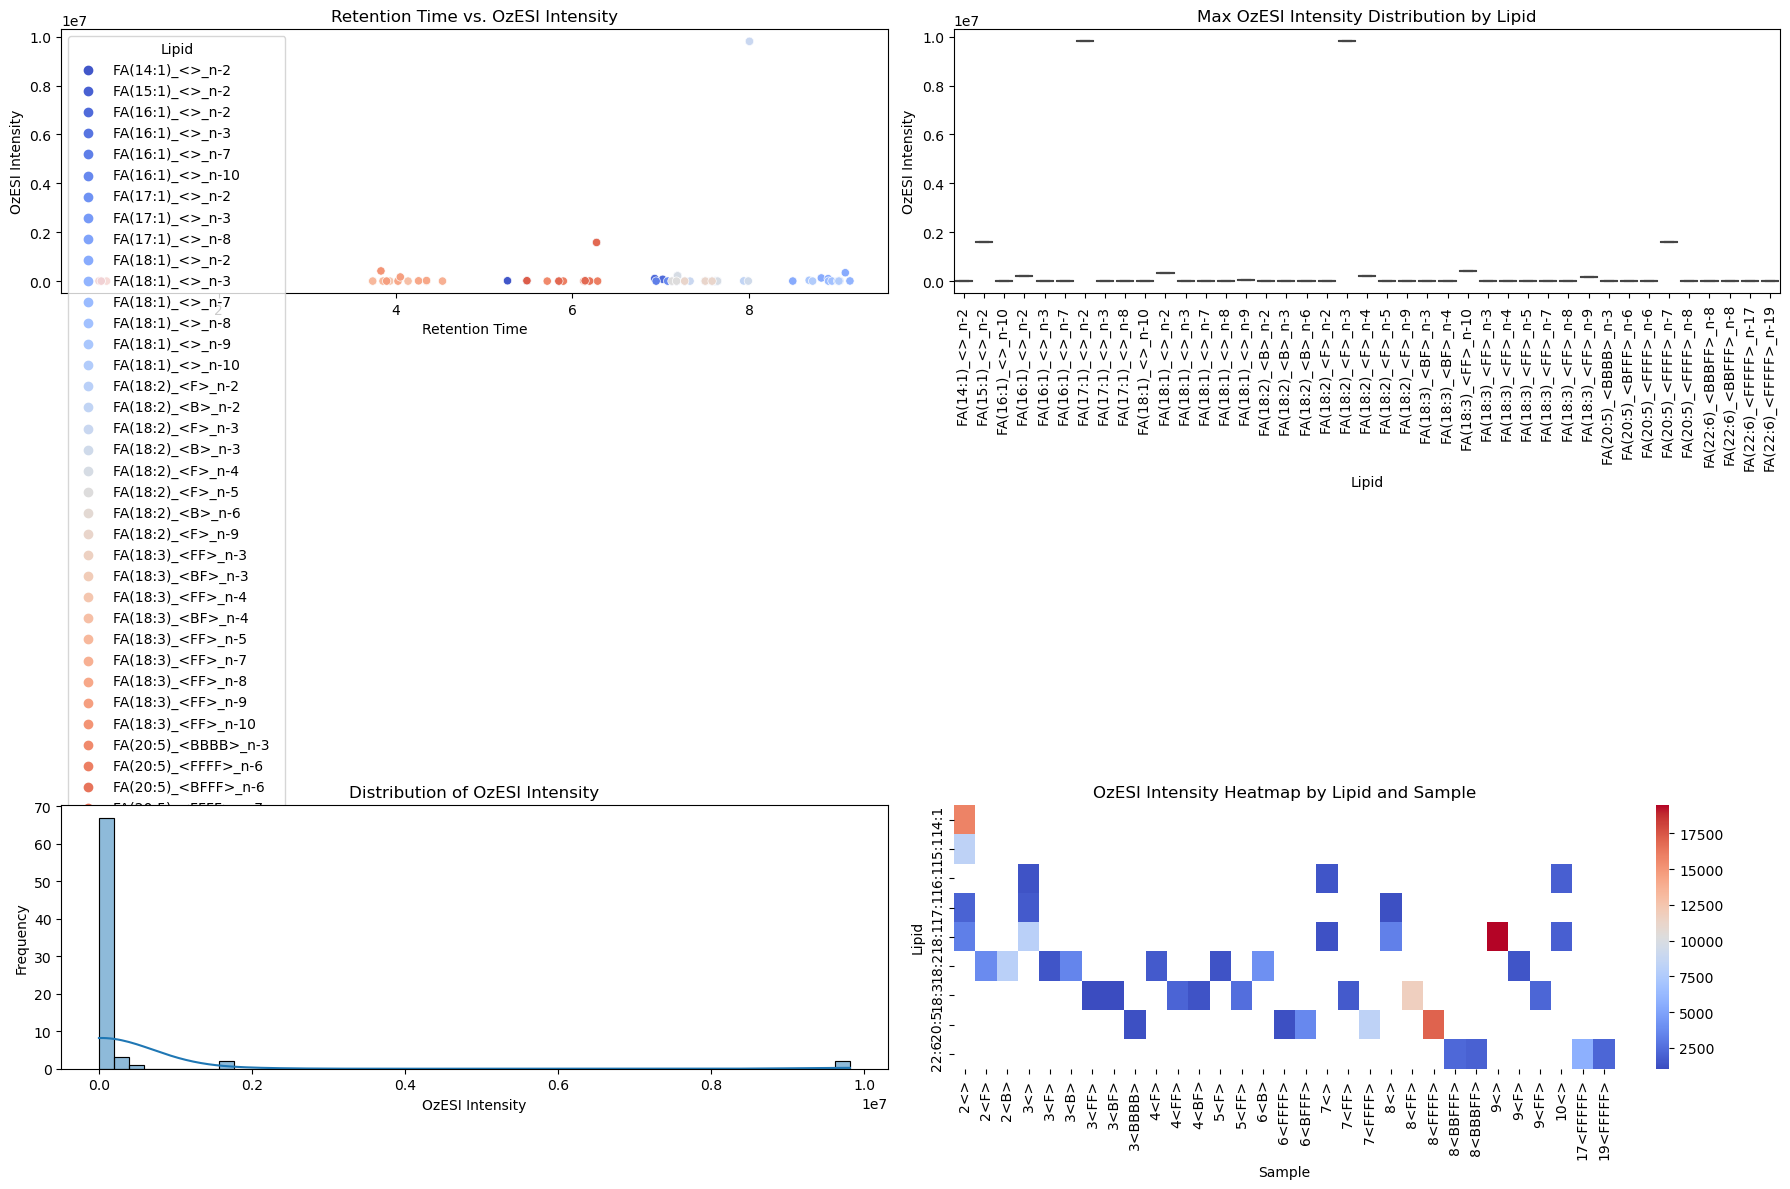

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df_test is your DataFrame and heatmap_data is already prepared

# Aggregate data to get the maximum intensity for each Lipid
df_max_intensity = df_test.groupby('Lipid')['OzESI_Intensity'].max().reset_index()

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Scatter plot
sns.scatterplot(data=df_test, x='Retention_Time', y='OzESI_Intensity', hue='Lipid', palette='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title('Retention Time vs. OzESI Intensity')
axs[0, 0].set_xlabel('Retention Time')
axs[0, 0].set_ylabel('OzESI Intensity')

# Box plot with max intensity
sns.boxplot(data=df_max_intensity, x='Lipid', y='OzESI_Intensity', ax=axs[0, 1])
axs[0, 1].set_title('Max OzESI Intensity Distribution by Lipid')
axs[0, 1].set_xlabel('Lipid')
axs[0, 1].set_ylabel('OzESI Intensity')
axs[0, 1].tick_params(axis='x', rotation=90)

# Histogram
sns.histplot(df_test['OzESI_Intensity'], bins=50, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of OzESI Intensity')
axs[1, 0].set_xlabel('OzESI Intensity')
axs[1, 0].set_ylabel('Frequency')

# Heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, ax=axs[1, 1])
axs[1, 1].set_title('OzESI Intensity Heatmap by Lipid and Sample')
axs[1, 1].set_xlabel('Sample')
axs[1, 1].set_ylabel('Lipid')

plt.tight_layout()
plt.show()
